In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import linearmodels as lm
import matplotlib
import math
import statsmodels.formula.api as smf
import statsmodels.api as sm

from linearmodels.panel import PanelOLS
from linearmodels.panel import RandomEffects
from linearmodels.panel import FirstDifferenceOLS
from linearmodels.panel import compare
from matplotlib import pyplot as plt

from pandas.api.types import is_numeric_dtype


pd.set_option('display.max_columns', 500)

%matplotlib inline

In [2]:
df=pd.read_csv('final_estimation_file_apta_added_greg2.csv',
                    encoding='utf-8')
df.drop(columns=['Unnamed: 0'],inplace=True)

In [3]:
tsd_data=pd.read_csv('tsd_pop_employment.csv',
                    encoding='utf-8')
tsd_data.drop(columns=['Unnamed: 0','CBSA Title'],inplace=True)
tsd_data.head()

,CBSA Code,STATE,Year,TOTAL_JOBS_WA_TRACTS,JOBS_LESS_THAN_1250_WA_TRACTS,JOBS_1250_3333_WA_TRACTS,JOBS_MORE_THAN_3333_WA_TRACTS,JOBS_WHITE_ALONE_WA_TRACTS,JOBS_BLACK_ALONE_WA_TRACTS,JOBS_HISPANIC_LATINO_WA_TRACTS,JOBS_LESS_THAN_40K_WA_TRACTS,JOBS_NON_WHITE_WA_TRACTS,JOBS_UPTO_HIGH_SCHOOL_WA_TRACTS,JOBS_COLLEGE_OR_HIGHER_WA_TRACTS,TOTAL_JOBS_WA_TSD_TRACTS,JOBS_LESS_THAN_1250_WA_TSD_TRACTS,JOBS_1250_3333_WA_TSD_TRACTS,JOBS_MORE_THAN_3333_WA_TSD_TRACTS,JOBS_WHITE_ALONE_WA_TSD_TRACTS,JOBS_BLACK_ALONE_WA_TSD_TRACTS,JOBS_HISPANIC_LATINO_WA_TSD_TRACTS,JOBS_LESS_THAN_40K_WA_TSD_TRACTS,JOBS_NON_WHITE_WA_TSD_TRACTS,JOBS_UPTO_HIGH_SCHHOL_WA_TSD_TRACTS,JOBS_COLLEGE_OR_HIGHER_WA_TSD_TRACTS,TOTAL_JOBS_RA_TRACTS,TOTAL_JOBS_WHITE_ALONE_RA_TRACTS,TOTAL_JOBS_BLACK_ALONE_RA_TRACTS,TOTAL_JOBS_HISPANIC_LATINO_RA_TRACTS,TOTAL_JOBS_UNDER_1250_RA_TRACTS,TOTAL_JOBS_BETN_1250_3333_RA_TRACTS,TOTAL_JOBS_OVER_3333_RA_TRACTS,TOTAL_JOBS_UNDER_3333_RA_TRACTS,TOTAL_JOBS_NON_WHITE_RA_TRACTS,TOTAL_JOBS_UPTO_HIGH_SCHHOL_RA_TRACTS,TOTAL_JOBS_COLLEGE_OR_HIGHER_RA_TRACTS,AREA_ACRE,TOTAL_JOBS_RA_TSD_TRACTS,TOTAL_JOBS_WHITE_ALONE_RA_TSD_TRACTS,TOTAL_JOBS_BLACK_ALONE_RA_TSD_TRACTS,TOTAL_JOBS_HISPANIC_LATINO_RA_TSD_TRACTS,TOTAL_JOBS_UNDER_1250_RA_TSD_TRACTS,TOTAL_JOBS_BETN_1250_3333_RA_TSD_TRACTS,TOTAL_JOBS_OVER_3333_RA_TSD_TRACTS,TOTAL_JOBS_UNDER_3333_RA_TSD_TRACTS,TOTAL_JOBS_NON_WHITE_RA_TSD_TRACTS,TOTAL_JOBS_UPTO_HIGH_SCHHOL_RA_TSD_TRACTS,TOTAL_JOBS_COLLEGE_OR_HIGHER_RA_TSD_TRACTS
0,10180,Texas,2002,57166.0,22735.0,25452.0,8979.0,0.0,0.0,0.0,48187.0,57166.0,0.0,0.0,9489.0,4531.0,3582.0,1376.0,0.0,0.0,0.0,8113.0,9489.0,0.0,0.0,58397.0,0.0,0.0,0.0,23086.0,25800.0,9511.0,48886.0,58397.0,0.0,0.0,1216.0,2355.0,0.0,0.0,0.0,954.0,1065.0,336.0,2019.0,2355.0,0.0,0.0
1,10180,Texas,2003,56917.0,21970.0,25046.0,9901.0,0.0,0.0,0.0,47016.0,56917.0,0.0,0.0,9484.0,4402.0,3471.0,1611.0,0.0,0.0,0.0,7873.0,9484.0,0.0,0.0,57221.0,0.0,0.0,0.0,22049.0,25074.0,10098.0,47123.0,57221.0,0.0,0.0,1216.0,2462.0,0.0,0.0,0.0,1032.0,1069.0,361.0,2101.0,2462.0,0.0,0.0
2,10180,Texas,2004,59025.0,22123.0,26375.0,10527.0,0.0,0.0,0.0,48498.0,59025.0,0.0,0.0,9599.0,4443.0,3594.0,1562.0,0.0,0.0,0.0,8037.0,9599.0,0.0,0.0,61419.0,0.0,0.0,0.0,23062.0,27199.0,11158.0,50261.0,61419.0,0.0,0.0,1216.0,2970.0,0.0,0.0,0.0,1231.0,1315.0,424.0,2546.0,2970.0,0.0,0.0
3,10180,Texas,2005,57879.0,21202.0,25353.0,11324.0,0.0,0.0,0.0,46555.0,57879.0,0.0,0.0,9645.0,4539.0,3500.0,1606.0,0.0,0.0,0.0,8039.0,9645.0,0.0,0.0,60001.0,0.0,0.0,0.0,21854.0,26081.0,12066.0,47935.0,60001.0,0.0,0.0,1216.0,2938.0,0.0,0.0,0.0,1134.0,1326.0,478.0,2460.0,2938.0,0.0,0.0
4,10180,Texas,2006,59588.0,21170.0,25759.0,12659.0,0.0,0.0,0.0,46929.0,59588.0,0.0,0.0,9819.0,4475.0,3516.0,1828.0,0.0,0.0,0.0,7991.0,9819.0,0.0,0.0,62311.0,0.0,0.0,0.0,22008.0,26639.0,13664.0,48647.0,62311.0,0.0,0.0,1216.0,2983.0,0.0,0.0,0.0,1122.0,1342.0,519.0,2464.0,2983.0,0.0,0.0


In [4]:
df=pd.merge(df,tsd_data,left_on=['CBSA','Year'],right_on=['CBSA Code','Year'],how='left')
df=df.drop_duplicates()
df.head()

,CBSA,MNAME,Mode,Year,UPT_ADJUSTED,VRM_ADJUSTED,FARE_ADJUSTED,FARE_per_UPT_cleaned,min_year,max_year,FARE_per_UPT,PROBLEM_FLAG,NOTE,PROBLEM_FLAG2,PROBLEM_FLAG3,Tot_Pop,Tot_Instate_Pop,Tot_Outstate_Pop,Tot_NonUSA_POP,Total_Median_Income_Individual,Native_Instate_Med_Inc_Indiv,Native_Outstate_Med_Inc_Indiv,Native_Outcountry_Med_Inc_Indiv,Total_Pop_Poverty,Pop_Below100_Poverty,Pop_Below150_Poverty,Pop_Above150_Poverty,Age_under18,Age_18to64,Age_over64,Total_HH,HH_0Veh,HH_1Veh,HH_2Veh,HH_3Veh,HH_4+Veh,PCT_HH_NO_VEH,HH_MED_INC,HH_MEAN_INC,INC_U35,INC_35_100,INC_100P,TOT_UNEMP_MSA,TOT_EMP_MSA,TOT_LABOR_MSA,UNEMP_RATE_PCT,EMP_RATE_PCT,GasPrice,Area_acre,POP_CENSUSTRACT,AVG_SPEED,2018_Dollar_Multiplier,TNC_ARRIVAL,Link_x,TNC_FLAG,YEARS_SINCE_TNC,FARE_ADJ_2018,TOTAL_MED_INC_INDIV_2018,NATIVE_INSTATE_MED_INC_2018,NATIVE_OUTSTATE_MED_INC_2018,HH_MED_INC_2018,HH_MEAN_INC_2018,GAS_PRICE_2018,dockCt,docklessCt,scooterCt,PBS_Start,PBS_End,PBS_Flag,Link,walkscore,transit,bike,CLUSTER_GT_NEW_11,CLUSTER_GT_ORIGINAL,CLUSTER_GT_8_GROUPS,CLUSTER_APTA,CLUSTER_NOTE,TOTAL_EMPLOYMENT,JTW_DA_PCT,JTW_CARPOOLED_PCT,JTW_TRANSIT_PCT,JTW_WALK_PCT,JTW_BICYCLE_PCT,JTW_OTHER_PCT,JTW_HOME_PCT,NOTE_JTW,AVG_FARE_2018,WEIGHTED_POP_DENSITY,_merge,CLUSTER_APTA_EXTENDED,CBSA Code,STATE,TOTAL_JOBS_WA_TRACTS,JOBS_LESS_THAN_1250_WA_TRACTS,JOBS_1250_3333_WA_TRACTS,JOBS_MORE_THAN_3333_WA_TRACTS,JOBS_WHITE_ALONE_WA_TRACTS,JOBS_BLACK_ALONE_WA_TRACTS,JOBS_HISPANIC_LATINO_WA_TRACTS,JOBS_LESS_THAN_40K_WA_TRACTS,JOBS_NON_WHITE_WA_TRACTS,JOBS_UPTO_HIGH_SCHOOL_WA_TRACTS,JOBS_COLLEGE_OR_HIGHER_WA_TRACTS,TOTAL_JOBS_WA_TSD_TRACTS,JOBS_LESS_THAN_1250_WA_TSD_TRACTS,JOBS_1250_3333_WA_TSD_TRACTS,JOBS_MORE_THAN_3333_WA_TSD_TRACTS,JOBS_WHITE_ALONE_WA_TSD_TRACTS,JOBS_BLACK_ALONE_WA_TSD_TRACTS,JOBS_HISPANIC_LATINO_WA_TSD_TRACTS,JOBS_LESS_THAN_40K_WA_TSD_TRACTS,JOBS_NON_WHITE_WA_TSD_TRACTS,JOBS_UPTO_HIGH_SCHHOL_WA_TSD_TRACTS,JOBS_COLLEGE_OR_HIGHER_WA_TSD_TRACTS,TOTAL_JOBS_RA_TRACTS,TOTAL_JOBS_WHITE_ALONE_RA_TRACTS,TOTAL_JOBS_BLACK_ALONE_RA_TRACTS,TOTAL_JOBS_HISPANIC_LATINO_RA_TRACTS,TOTAL_JOBS_UNDER_1250_RA_TRACTS,TOTAL_JOBS_BETN_1250_3333_RA_TRACTS,TOTAL_JOBS_OVER_3333_RA_TRACTS,TOTAL_JOBS_UNDER_3333_RA_TRACTS,TOTAL_JOBS_NON_WHITE_RA_TRACTS,TOTAL_JOBS_UPTO_HIGH_SCHHOL_RA_TRACTS,TOTAL_JOBS_COLLEGE_OR_HIGHER_RA_TRACTS,AREA_ACRE,TOTAL_JOBS_RA_TSD_TRACTS,TOTAL_JOBS_WHITE_ALONE_RA_TSD_TRACTS,TOTAL_JOBS_BLACK_ALONE_RA_TSD_TRACTS,TOTAL_JOBS_HISPANIC_LATINO_RA_TSD_TRACTS,TOTAL_JOBS_UNDER_1250_RA_TSD_TRACTS,TOTAL_JOBS_BETN_1250_3333_RA_TSD_TRACTS,TOTAL_JOBS_OVER_3333_RA_TSD_TRACTS,TOTAL_JOBS_UNDER_3333_RA_TSD_TRACTS,TOTAL_JOBS_NON_WHITE_RA_TSD_TRACTS,TOTAL_JOBS_UPTO_HIGH_SCHHOL_RA_TSD_TRACTS,TOTAL_JOBS_COLLEGE_OR_HIGHER_RA_TSD_TRACTS
0,10420,"Akron, OH Metro Area",Bus,2002,5226386,4026372,596583,0.114148,2002,2018,0.114148,NaN,Bad fare,NaN,1.0,646583.7344,496141.0469,137193.6719,-389.53125,25405.20313,26028.32813,26651.07813,7117.03125,682354.11,7.55,8.94,83.85,24.64,62.9,12.46,265452.20,22830.14,58254.52,117083.25,46891.53,20392.77,8.60,43046.82813,55300.5625,39.49,46.56,13.95,21948.42,346147.17,368095.58,5.96,94.04,1.36,NaN,119786.0,14.88,1.40,2014,http://www.crainscleveland.com/article/2014082...,0,0,4004892.28,35567.28438,36439.65938,37311.50938,60265.55938,77420.7875,1.9040,0,0,0,NaN,NaN,0.0,NaN,0,0,0,1,1,H,24,NaN,309488.2031,87.4,6.2,0.8,1.7,0.1,0.7,3.1,Goes to negative when extrapolating. Possible ...,0.159808,2417.239652,both,24,10420.0,Ohio,314749.0,96006.0,131687.0,87056.0,0.0,0.0,0.0,227693.0,314749.0,0.0,0.0,81463.0,23319.0,33326.0,24818.0,0.0,0.0,0.0,56645.0,81463.0,0.0,0.0,305401.0,0.0,0.0,0.0,92556.0,127165.0,85680.0,219721.0,305401.0,0.0,0.0,13619.2,54517.0,0.0,0.0,0.0,18228.0,25397.0,10892.0,43625.0,54517.0,0.0,0.0
1,10420,"Akron, OH Metro Area",Bus,2003,5395902,3976569,2318587,0.429694,2002,2018,0.429694,NaN,NaN,NaN,NaN,659397.0625,504631.8125,137582.3125,753.12500,25120.18750,25632.68750,25995.68750,10350.875,682850.56,8.81,8.66,82.79,24.33,63.0,12.68,269144.19,22073.44,67400.94,1

In [5]:
# WAC data derived columns. To account for people coming into the TSD from outlying areas.
df['TSD_WA_EMP_PCT_LEHD']=100*df['TOTAL_JOBS_WA_TSD_TRACTS']/df['TOTAL_JOBS_WA_TRACTS']
df['TSD_WA_EMP_PCT_CBSA']=100*df['TOTAL_JOBS_WA_TSD_TRACTS']/df['TOT_EMP_MSA']

df['JOBS_LESS_THAN_3333_WA_TRACTS']=df['JOBS_LESS_THAN_1250_WA_TRACTS']+df['JOBS_1250_3333_WA_TRACTS']
df['JOBS_LESS_THAN_3333_WA_TSD_TRACTS']=df['JOBS_LESS_THAN_1250_WA_TSD_TRACTS']+df['JOBS_1250_3333_WA_TSD_TRACTS']

df['TSD_WA_EMP_WAGE_UNDER_1250']=100*df['JOBS_LESS_THAN_1250_WA_TSD_TRACTS']/df['TOTAL_JOBS_WA_TRACTS']
df['TSD_WA_EMP_WAGE_BETN_1250_3333']=100*df['JOBS_1250_3333_WA_TSD_TRACTS']/df['TOTAL_JOBS_WA_TRACTS']
df['TSD_WA_EMP_WAGE_UNDER_3333']=100*df['JOBS_LESS_THAN_3333_WA_TSD_TRACTS']/df['TOTAL_JOBS_WA_TRACTS']

df['TSD_WA_EMP_WAGE_UNDER_1250_PCT_WA']=100*df['JOBS_LESS_THAN_1250_WA_TSD_TRACTS']/df['JOBS_LESS_THAN_1250_WA_TRACTS']
df['TSD_WA_EMP_WAGE_BETN_1250_3333_PCT_WA']=100*df['JOBS_1250_3333_WA_TSD_TRACTS']/df['JOBS_1250_3333_WA_TRACTS']
df['TSD_WA_EMP_WAGE_UNDER_3333_PCT_WA']=100*df['JOBS_LESS_THAN_3333_WA_TSD_TRACTS']/df['JOBS_LESS_THAN_3333_WA_TRACTS']

df['TSD_WA_EMP_WAGE_UNDER_1250_PCT_TSD']=100*df['JOBS_LESS_THAN_1250_WA_TSD_TRACTS']/df['TOTAL_JOBS_WA_TSD_TRACTS']
df['TSD_WA_EMP_WAGE_BETN_1250_3333_PCT_TSD']=100*df['JOBS_1250_3333_WA_TSD_TRACTS']/df['TOTAL_JOBS_WA_TSD_TRACTS']
df['TSD_WA_EMP_WAGE_UNDER_3333_PCT_TSD']=100*df['JOBS_LESS_THAN_3333_WA_TSD_TRACTS']/df['TOTAL_JOBS_WA_TSD_TRACTS']

#RAC data derived columns.

df['TSD_POP_PCT_LEHD']=100*df['TOTAL_JOBS_RA_TSD_TRACTS']/df['TOTAL_JOBS_RA_TRACTS'] #RAC data
df['TSD_POP_PCT_CBSA']=100*df['TOTAL_JOBS_RA_TSD_TRACTS']/df['Tot_Pop']
df['TSD_POP_WAGE_UNDER_1250']=100*df['TOTAL_JOBS_UNDER_1250_RA_TSD_TRACTS']/df['TOTAL_JOBS_RA_TRACTS']
df['TSD_POP_WAGE_BETN_1250_3333']=100*df['TOTAL_JOBS_BETN_1250_3333_RA_TSD_TRACTS']/df['TOTAL_JOBS_RA_TRACTS']
df['TSD_POP_WAGE_UNDER_3333']=100*df['TOTAL_JOBS_UNDER_3333_RA_TSD_TRACTS']/df['TOTAL_JOBS_RA_TRACTS']

df['TSD_POP_WAGE_UNDER_1250_PCT_RA']=100*df['TOTAL_JOBS_UNDER_1250_RA_TSD_TRACTS']/df['TOTAL_JOBS_UNDER_1250_RA_TRACTS']
df['TSD_POP_WAGE_BETN_1250_3333_PCT_RA']=100*df['TOTAL_JOBS_BETN_1250_3333_RA_TSD_TRACTS']/df['TOTAL_JOBS_BETN_1250_3333_RA_TRACTS']
df['TSD_POP_WAGE_UNDER_3333_PCT_RA']=100*df['TOTAL_JOBS_UNDER_3333_RA_TSD_TRACTS']/df['TOTAL_JOBS_UNDER_3333_RA_TRACTS']

df['TSD_POP_WAGE_UNDER_1250_PCT_TSD']=100*df['TOTAL_JOBS_UNDER_1250_RA_TSD_TRACTS']/df['TOTAL_JOBS_RA_TSD_TRACTS']
df['TSD_POP_WAGE_BETN_1250_3333_PCT_TSD']=100*df['TOTAL_JOBS_BETN_1250_3333_RA_TSD_TRACTS']/df['TOTAL_JOBS_RA_TSD_TRACTS']
df['TSD_POP_WAGE_UNDER_3333_PCT_TSD']=100*df['TOTAL_JOBS_UNDER_3333_RA_TSD_TRACTS']/df['TOTAL_JOBS_RA_TSD_TRACTS']


In [6]:
# read updated TNC revenue data
# tnc_rev=pd.read_csv('TNC_REVENUE_3.csv')
# tnc_rev.drop(columns=['Unnamed: 0'],inplace=True)
# tnc_rev=tnc_rev.drop_duplicates(['CBSA','MNAME','Year'])
# tnc_rev.head()

tnc_rev=pd.read_csv('TNC_CBSA_FINAL_2.csv')

tnc_rev.drop(columns=['MNAME','Tot_Pop'],inplace=True)
# tnc_rev=tnc_rev.drop_duplicates(['CBSA','MNAME','Year'])
tnc_rev.head()

,CBSA,Year,TNC_CLUSTER,TOT_POP_CLUSTER,TOTAL_YEARLY_POPULATION,POP_SHARE,TOTAL_TRIPS_PER_CAPITA,TNC_TRIPS_SCALED,TOTAL_TNC_TRIPS_PER_CLUSTER,TRIPS_SCALED,Scale_2,TNC_TRIPS,TNC_TRIPS_PER_CAPITA_CLUSTER
0,10420,2014,21,20063673.0,119360751,0.035997,4.034635,0.9718,80.9496,19.497887,0.514568,10.0,0.5
1,10740,2014,21,20063673.0,119360751,0.035997,4.034635,0.9718,80.9496,19.497887,0.514568,10.0,0.5
2,10900,2014,21,20063673.0,119360751,0.035997,4.034635,0.9718,80.9496,19.497887,0.514568,10.0,0.5
3,11460,2014,21,20063673.0,119360751,0.035997,4.034635,0.9718,80.9496,19.497887,0.514568,10.0,0.5
4,12420,2014,21,20063673.0,119360751,0.035997,4.034635,0.9718,80.9496,19.497887,0.514568,10.0,0.5


In [7]:
df=pd.merge(df,tnc_rev,on=['CBSA','Year'],how='left')
df['TNC_TRIPS_PER_CAPITA_CLUSTER']=df['TNC_TRIPS_PER_CAPITA_CLUSTER'].fillna(0)
df.head()

,CBSA,MNAME,Mode,Year,UPT_ADJUSTED,VRM_ADJUSTED,FARE_ADJUSTED,FARE_per_UPT_cleaned,min_year,max_year,FARE_per_UPT,PROBLEM_FLAG,NOTE,PROBLEM_FLAG2,PROBLEM_FLAG3,Tot_Pop,Tot_Instate_Pop,Tot_Outstate_Pop,Tot_NonUSA_POP,Total_Median_Income_Individual,Native_Instate_Med_Inc_Indiv,Native_Outstate_Med_Inc_Indiv,Native_Outcountry_Med_Inc_Indiv,Total_Pop_Poverty,Pop_Below100_Poverty,Pop_Below150_Poverty,Pop_Above150_Poverty,Age_under18,Age_18to64,Age_over64,Total_HH,HH_0Veh,HH_1Veh,HH_2Veh,HH_3Veh,HH_4+Veh,PCT_HH_NO_VEH,HH_MED_INC,HH_MEAN_INC,INC_U35,INC_35_100,INC_100P,TOT_UNEMP_MSA,TOT_EMP_MSA,TOT_LABOR_MSA,UNEMP_RATE_PCT,EMP_RATE_PCT,GasPrice,Area_acre,POP_CENSUSTRACT,AVG_SPEED,2018_Dollar_Multiplier,TNC_ARRIVAL,Link_x,TNC_FLAG,YEARS_SINCE_TNC,FARE_ADJ_2018,TOTAL_MED_INC_INDIV_2018,NATIVE_INSTATE_MED_INC_2018,NATIVE_OUTSTATE_MED_INC_2018,HH_MED_INC_2018,HH_MEAN_INC_2018,GAS_PRICE_2018,dockCt,docklessCt,scooterCt,PBS_Start,PBS_End,PBS_Flag,Link,walkscore,transit,bike,CLUSTER_GT_NEW_11,CLUSTER_GT_ORIGINAL,CLUSTER_GT_8_GROUPS,CLUSTER_APTA,CLUSTER_NOTE,TOTAL_EMPLOYMENT,JTW_DA_PCT,JTW_CARPOOLED_PCT,JTW_TRANSIT_PCT,JTW_WALK_PCT,JTW_BICYCLE_PCT,JTW_OTHER_PCT,JTW_HOME_PCT,NOTE_JTW,AVG_FARE_2018,WEIGHTED_POP_DENSITY,_merge,CLUSTER_APTA_EXTENDED,CBSA Code,STATE,TOTAL_JOBS_WA_TRACTS,JOBS_LESS_THAN_1250_WA_TRACTS,JOBS_1250_3333_WA_TRACTS,JOBS_MORE_THAN_3333_WA_TRACTS,JOBS_WHITE_ALONE_WA_TRACTS,JOBS_BLACK_ALONE_WA_TRACTS,JOBS_HISPANIC_LATINO_WA_TRACTS,JOBS_LESS_THAN_40K_WA_TRACTS,JOBS_NON_WHITE_WA_TRACTS,JOBS_UPTO_HIGH_SCHOOL_WA_TRACTS,JOBS_COLLEGE_OR_HIGHER_WA_TRACTS,TOTAL_JOBS_WA_TSD_TRACTS,JOBS_LESS_THAN_1250_WA_TSD_TRACTS,JOBS_1250_3333_WA_TSD_TRACTS,JOBS_MORE_THAN_3333_WA_TSD_TRACTS,JOBS_WHITE_ALONE_WA_TSD_TRACTS,JOBS_BLACK_ALONE_WA_TSD_TRACTS,JOBS_HISPANIC_LATINO_WA_TSD_TRACTS,JOBS_LESS_THAN_40K_WA_TSD_TRACTS,JOBS_NON_WHITE_WA_TSD_TRACTS,JOBS_UPTO_HIGH_SCHHOL_WA_TSD_TRACTS,JOBS_COLLEGE_OR_HIGHER_WA_TSD_TRACTS,TOTAL_JOBS_RA_TRACTS,TOTAL_JOBS_WHITE_ALONE_RA_TRACTS,TOTAL_JOBS_BLACK_ALONE_RA_TRACTS,TOTAL_JOBS_HISPANIC_LATINO_RA_TRACTS,TOTAL_JOBS_UNDER_1250_RA_TRACTS,TOTAL_JOBS_BETN_1250_3333_RA_TRACTS,TOTAL_JOBS_OVER_3333_RA_TRACTS,TOTAL_JOBS_UNDER_3333_RA_TRACTS,TOTAL_JOBS_NON_WHITE_RA_TRACTS,TOTAL_JOBS_UPTO_HIGH_SCHHOL_RA_TRACTS,TOTAL_JOBS_COLLEGE_OR_HIGHER_RA_TRACTS,AREA_ACRE,TOTAL_JOBS_RA_TSD_TRACTS,TOTAL_JOBS_WHITE_ALONE_RA_TSD_TRACTS,TOTAL_JOBS_BLACK_ALONE_RA_TSD_TRACTS,TOTAL_JOBS_HISPANIC_LATINO_RA_TSD_TRACTS,TOTAL_JOBS_UNDER_1250_RA_TSD_TRACTS,TOTAL_JOBS_BETN_1250_3333_RA_TSD_TRACTS,TOTAL_JOBS_OVER_3333_RA_TSD_TRACTS,TOTAL_JOBS_UNDER_3333_RA_TSD_TRACTS,TOTAL_JOBS_NON_WHITE_RA_TSD_TRACTS,TOTAL_JOBS_UPTO_HIGH_SCHHOL_RA_TSD_TRACTS,TOTAL_JOBS_COLLEGE_OR_HIGHER_RA_TSD_TRACTS,TSD_WA_EMP_PCT_LEHD,TSD_WA_EMP_PCT_CBSA,JOBS_LESS_THAN_3333_WA_TRACTS,JOBS_LESS_THAN_3333_WA_TSD_TRACTS,TSD_WA_EMP_WAGE_UNDER_1250,TSD_WA_EMP_WAGE_BETN_1250_3333,TSD_WA_EMP_WAGE_UNDER_3333,TSD_WA_EMP_WAGE_UNDER_1250_PCT_WA,TSD_WA_EMP_WAGE_BETN_1250_3333_PCT_WA,TSD_WA_EMP_WAGE_UNDER_3333_PCT_WA,TSD_WA_EMP_WAGE_UNDER_1250_PCT_TSD,TSD_WA_EMP_WAGE_BETN_1250_3333_PCT_TSD,TSD_WA_EMP_WAGE_UNDER_3333_PCT_TSD,TSD_POP_PCT_LEHD,TSD_POP_PCT_CBSA,TSD_POP_WAGE_UNDER_1250,TSD_POP_WAGE_BETN_1250_3333,TSD_POP_WAGE_UNDER_3333,TSD_POP_WAGE_UNDER_1250_PCT_RA,TSD_POP_WAGE_BETN_1250_3333_PCT_RA,TSD_POP_WAGE_UNDER_3333_PCT_RA,TSD_POP_WAGE_UNDER_1250_PCT_TSD,TSD_POP_WAGE_BETN_1250_3333_PCT_TSD,TSD_POP_WAGE_UNDER_3333_PCT_TSD,TNC_CLUSTER,TOT_POP_CLUSTER,TOTAL_YEARLY_POPULATION,POP_SHARE,TOTAL_TRIPS_PER_CAPITA,TNC_TRIPS_SCALED,TOTAL_TNC_TRIPS_PER_CLUSTER,TRIPS_SCALED,Scale_2,TNC_TRIPS,TNC_TRIPS_PER_CAPITA_CLUSTER
0,10420,"Akron, OH Metro Area",Bus,2002,5226386,4026372,596583,0.114148,2002,2018,0.114148,NaN,Bad fare,NaN,1.0,646583.7344,496141.0469,137193.6719,-389.53125,25405.20313,26028.32813,26651.07813,7117.03125,682354.11,7.55,8.94,83.85,24.64,62.9,12.46,265452.20,22830.14,58254.52,117083.25,46891.53,20392.77,8.60,43046.82813,55300.5625,39.49,46.56,13.95,21948.42,346147.17,368095.58,5.96,94.0

In [8]:
df['TNC_TRIPS_PER_CAPITA_CLUSTER']=df['TNC_TRIPS_PER_CAPITA_CLUSTER'].astype(float)
df['TNC_TRIPS_PER_CAPITA_CLUSTER'].describe()

count    4718.000000
mean        0.841034
std         2.313638
min         0.000000
25%         0.000000
50%         0.000000
75%         0.700000
max        30.400000
Name: TNC_TRIPS_PER_CAPITA_CLUSTER, dtype: float64

In [9]:
#df=pd.merge(df,tnc_rev,on=['CBSA','MNAME','Year'],how='left')
# df['TNC_REVENUE']=df['TNC_REVENUE'].fillna(0)
# df['TNC_TRIPS']=df['TNC_TRIPS'].fillna(0)
# df['TNC_BOOKINGS']=df['TNC_BOOKINGS'].fillna(0)
# df.head()

In [10]:
# read in and join the maintenance and restructure data
mr=pd.read_csv('maintenance_restructure.csv',
                    encoding='utf-8')
mr = mr[['CBSA', 'Mode', 'Year', 'MAINTENANCE', 'MAINTENANCE_NYC', 'MAINTENANCE_WMATA', 'RESTRUCTURE']]

df = df.merge(mr, on=['CBSA', 'Mode', 'Year'], how='left')

In [11]:
# read in mechanical and other failures

failures=pd.read_csv('maintenance_final.csv',encoding='utf-8')

failures.drop(columns=['Unnamed: 0'],inplace=True)

df=df.merge(failures, on=['CBSA','MNAME','Mode','Year'],how='left')

In [12]:
df=df.rename(columns={'UPT_ADJUSTED':'UPT_ADJ','VRM_ADJUSTED':'VRM_ADJ','FARE_ADJUSTED':'FARE_ADJ','AVG_FARE_2018':'FARE_per_UPT_2018',
                     'Mecha_Failures':'Mechanical_Failures'})

In [13]:
df['Mechanical_Failures']=df['Mechanical_Failures'].fillna(0)
df['Total_Failures']=df['Total_Failures'].fillna(0)
df['MDBF_Mechanical']=np.where(df['Mechanical_Failures']>0,df['VRM_ADJ']/df['Mechanical_Failures'],df['VRM_ADJ'])
df['MDBF_Total']=np.where(df['Total_Failures']>0,df['VRM_ADJ']/df['Total_Failures'],df['VRM_ADJ'])

In [14]:
# read in and join the bike share updates
bsu=pd.read_csv('bike_share_update.csv',
                    encoding='utf-8')
bsu = bsu[['CBSA', 'Mode', 'Year', 'PBS_Flag_Update']]

df = df.merge(bsu, on=['CBSA', 'Mode', 'Year'], how='left')

#df['PBS_Flag_Missing'] = df['PBS_Flag'].apply(lambda x : x.isnan())
df['PBS_Flag'] = np.where(df['PBS_Flag'].isnull(), df['PBS_Flag_Update'], df['PBS_Flag'])

In [15]:
# 4 apta clusers
df['CLUSTER_APTA4'] = np.floor(df['CLUSTER_APTA']/10)

In [16]:
# exclude if ridership is zero--missing data
df = df[df['UPT_ADJ']>0]

In [17]:
# fill in missing data as needed

# min fare is zero
df['FARE_per_UPT_2018'] = df['FARE_per_UPT_2018'].apply(lambda x : max(x,0))

# max fare is $20
df['FARE_per_UPT_2018'] = df['FARE_per_UPT_2018'].apply(lambda x : min(x,20))

# zero vehicle HH can't go negative
df['HH_0Veh'] = df['HH_0Veh'].apply(lambda x : max(x,0))

In [18]:
df=df.drop_duplicates(['CBSA','Mode','Year'])

In [19]:
# convert JTW to numeric columns
df['JTW_DA_PCT']        = df['JTW_DA_PCT'].replace('#VALUE!', np.nan)
df['JTW_CARPOOLED_PCT'] = df['JTW_CARPOOLED_PCT'].replace('#VALUE!', np.nan)
df['JTW_TRANSIT_PCT']   = df['JTW_TRANSIT_PCT'].replace('#VALUE!', np.nan)
df['JTW_WALK_PCT']      = df['JTW_WALK_PCT'].replace('#VALUE!', np.nan)
df['JTW_BICYCLE_PCT']   = df['JTW_BICYCLE_PCT'].replace('#VALUE!', np.nan)
df['JTW_OTHER_PCT']     = df['JTW_OTHER_PCT'].replace('#VALUE!', np.nan)
df['JTW_HOME_PCT']      = df['JTW_HOME_PCT'].replace('#VALUE!', np.nan)


df['JTW_DA_PCT']        = df['JTW_DA_PCT'].replace('N', np.nan)
df['JTW_CARPOOLED_PCT'] = df['JTW_CARPOOLED_PCT'].replace('N', np.nan)
df['JTW_TRANSIT_PCT']   = df['JTW_TRANSIT_PCT'].replace('N', np.nan)
df['JTW_WALK_PCT']      = df['JTW_WALK_PCT'].replace('N', np.nan)
df['JTW_BICYCLE_PCT']   = df['JTW_BICYCLE_PCT'].replace('N', np.nan)
df['JTW_OTHER_PCT']     = df['JTW_OTHER_PCT'].replace('N', np.nan)
df['JTW_HOME_PCT']      = df['JTW_HOME_PCT'].replace('N', np.nan)



In [20]:
# convert JTW to numeric columns
df['JTW_DA_PCT']        = df['JTW_DA_PCT'].astype(float)
df['JTW_CARPOOLED_PCT'] = df['JTW_CARPOOLED_PCT'].astype(float)
df['JTW_TRANSIT_PCT']   = df['JTW_TRANSIT_PCT'].astype(float)
df['JTW_WALK_PCT']      = df['JTW_WALK_PCT'].astype(float)
df['JTW_BICYCLE_PCT']   = df['JTW_BICYCLE_PCT'].astype(float)
df['JTW_OTHER_PCT']     = df['JTW_OTHER_PCT'].astype(float)
df['JTW_HOME_PCT']      = df['JTW_HOME_PCT'].astype(float)

In [21]:
# exclude problematic data
old_len = len(df)
df = df[df['VRM_ADJ']>0]
new_len = len(df)
print('Excluding ' + str(old_len-new_len) + ' records with missing VRM') 

# exclude if JTW data are missing
old_len = len(df)
df = df[df['JTW_HOME_PCT']>=0]
new_len = len(df)
print('Excluding ' + str(old_len-new_len) + ' records with missing JTW data') 

# exclude if problem flag 3 is set
old_len = len(df)
df = df[df['PROBLEM_FLAG3']!=1]
new_len = len(df)
print('Excluding ' + str(old_len-new_len) + ' records with problem flag set to 1') 

# exclude rail in low op-ex group
old_len = len(df)
df['LOW_OPEX'] = np.where(df['CLUSTER_APTA4']==3, 1, 0)
df['RAIL_FLAG'] = np.where(df['Mode']=='Rail', 1, 0)
df['LOW_OPEX_RAIL'] = df['LOW_OPEX'] * df['RAIL_FLAG']
df = df[df['LOW_OPEX_RAIL']==0]
new_len = len(df)
print('Excluding ' + str(old_len-new_len) + ' records with that have rail in the low op-ex group') 



Excluding 1 records with missing VRM
Excluding 25 records with missing JTW data
Excluding 161 records with problem flag set to 1
Excluding 48 records with that have rail in the low op-ex group


In [22]:
# exclude discontinuous data
df = df.sort_values(by=['CBSA', 'Mode', 'Year'])

excluded_records = 100
while excluded_records > 0: 
    old_len = len(df)
    df['YearDiff'] = df['Year'].shift(-1) - df['Year']
    df = df[(df['YearDiff']==1) | (df['Year']==2018)]
    excluded_records = old_len - len(df)
    print('Excluding ' + str(excluded_records) + ' records with discontinuities in year.') 




Excluding 22 records with discontinuities in year.
Excluding 19 records with discontinuities in year.
Excluding 16 records with discontinuities in year.
Excluding 15 records with discontinuities in year.
Excluding 14 records with discontinuities in year.
Excluding 13 records with discontinuities in year.
Excluding 12 records with discontinuities in year.
Excluding 9 records with discontinuities in year.
Excluding 8 records with discontinuities in year.
Excluding 8 records with discontinuities in year.
Excluding 7 records with discontinuities in year.
Excluding 6 records with discontinuities in year.
Excluding 5 records with discontinuities in year.
Excluding 4 records with discontinuities in year.
Excluding 1 records with discontinuities in year.
Excluding 1 records with discontinuities in year.
Excluding 0 records with discontinuities in year.


In [23]:
# set the indices
df['ID'] = df['MNAME'] + '-' + df['Mode']
df['ID2'] = df['ID']
df['YEAR2'] = df['Year']
df=df.set_index(['ID','Year'])

# exclude if it is not in operation at least since 2012
ids = df.index.get_level_values(0).unique()

for id in ids: 
    years = df.loc[id].index.get_level_values(0).sort_values()
    first_year = years[0]
    
    for year in years: 
        df.loc[(id,year),'FIRST_YEAR'] = first_year
        
df = df.reset_index()

# excldue where not in operation since at least 2012
old_len = len(df)
df = df[df['FIRST_YEAR']<=2012]
new_len = len(df)
print('Excluding ' + str(old_len-new_len) + ' records starting operation later than 2012') 



Excluding 32 records starting operation later than 2012


In [24]:
df['BUS_FLAG'] = np.where(df['Mode']=='Bus', 1, 0)
df['RAIL_FLAG'] = np.where(df['Mode']=='Rail', 1, 0)

In [25]:
# include population + employment
df['POP_EMP'] = df['Tot_Pop'] + df['TOT_EMP_MSA']
df['HH_EMP'] = df['Total_HH'] + df['TOT_EMP_MSA']


# percent of pop born outside USA
df['Tot_NonUSA_POP_pct'] = df['Tot_NonUSA_POP'] / df['Tot_Pop'] * 100

In [26]:
df.to_csv('merged_estfile.csv')

In [27]:
# time effects
df['YEARS_SINCE_2002']  = df['Year'] - 2002

df['YEARS_2002_2010']  = df['Year'].apply(lambda x : min(x-2002, 8))
df['YEARS_AFTER_2010'] = df['Year'].apply(lambda x : max(x-2010, 0))

df['YEARS_2002_2014']  = df['Year'].apply(lambda x : min(x-2002, 12))
df['YEARS_AFTER_2014'] = df['Year'].apply(lambda x : max(x-2014, 0))


df['YEARS_SINCE_2002_BUS']  = df['YEARS_SINCE_2002'] * df['BUS_FLAG']
df['YEARS_SINCE_2002_RAIL'] = df['YEARS_SINCE_2002'] * df['RAIL_FLAG']

df['YEARS_2002_2010_BUS']   = df['YEARS_2002_2010'] * df['BUS_FLAG']
df['YEARS_AFTER_2010_BUS']  = df['YEARS_AFTER_2010']* df['BUS_FLAG']
df['YEARS_2002_2010_RAIL']  = df['YEARS_2002_2010'] * df['RAIL_FLAG']
df['YEARS_AFTER_2010_RAIL'] = df['YEARS_AFTER_2010']* df['RAIL_FLAG']

df['YEARS_2002_2014_BUS']   = df['YEARS_2002_2014'] * df['BUS_FLAG']
df['YEARS_AFTER_2014_BUS']  = df['YEARS_AFTER_2014']* df['BUS_FLAG']
df['YEARS_2002_2014_RAIL']  = df['YEARS_2002_2014'] * df['RAIL_FLAG']
df['YEARS_AFTER_2014_RAIL'] = df['YEARS_AFTER_2014']* df['RAIL_FLAG']

In [28]:
# more time effects

df['YEARS_AFTER_2012'] = df['Year'].apply(lambda x : max(x-2012, 0))

df['TNC_YEARS_AFTER_2012'] = df['YEARS_AFTER_2012'] * df['TNC_FLAG']

df['TNC_YEARS_AFTER_2012_BUS'] = df['TNC_YEARS_AFTER_2012'] * df['BUS_FLAG']
df['TNC_YEARS_AFTER_2012_RAIL'] = df['TNC_YEARS_AFTER_2012'] * df['RAIL_FLAG']

In [29]:

df['YEARS_SINCE_TNC_2012'] = np.minimum(df['YEARS_SINCE_TNC'], df['YEARS_AFTER_2012'])

df['YEARS_SINCE_TNC_2012_BUS'] = df['YEARS_SINCE_TNC_2012'] * df['BUS_FLAG']
df['YEARS_SINCE_TNC_2012_RAIL'] = df['YEARS_SINCE_TNC_2012'] * df['RAIL_FLAG']

In [30]:
# test rail ramp up period
df['YEARS_SINCE_RAIL_START'] = (df['Year'] - df['min_year']) * df['RAIL_FLAG']
df['YEARS_SINCE_RAIL_START'] = np.where(df['min_year']==2002, 0, df['YEARS_SINCE_RAIL_START'])

df['YEARS_SINCE_RAIL_START_1'] = df['YEARS_SINCE_RAIL_START'].apply(lambda x : min(x, 1))
df['YEARS_SINCE_RAIL_START_2'] = df['YEARS_SINCE_RAIL_START'].apply(lambda x : min(x, 2))
df['YEARS_SINCE_RAIL_START_3'] = df['YEARS_SINCE_RAIL_START'].apply(lambda x : min(x, 3))



In [31]:
# calculate bus vs rail stuff

# various bus/rail specifics

df['TNC_FLAG_BUS'] = df['TNC_FLAG'] * df['BUS_FLAG']
df['TNC_FLAG_RAIL'] = df['TNC_FLAG'] * df['RAIL_FLAG']

df['YEARS_SINCE_TNC_BUS'] = df['YEARS_SINCE_TNC'] * df['BUS_FLAG']
df['YEARS_SINCE_TNC_RAIL'] = df['YEARS_SINCE_TNC'] * df['RAIL_FLAG']

df['dockless_flag'] = df['dockCt'].apply(lambda x : min(x,1))
df['scooter_flag']  = df['scooterCt'].apply(lambda x : min(x,1))

df['BIKE_SHARE'] = df['PBS_Flag'] + df['dockless_flag']
df['BIKE_SHARE'] = df['BIKE_SHARE'].apply(lambda x : min(x,1))


df['PBS_Flag_BUS']   = df['PBS_Flag']   * df['BUS_FLAG']
df['dockCt_BUS']     = df['dockCt']     * df['BUS_FLAG']
df['docklessCt_BUS'] = df['docklessCt'] * df['BUS_FLAG']
df['scooterCt_BUS']  = df['scooterCt']  * df['BUS_FLAG']
df['dockless_flag_BUS'] = df['dockless_flag'] * df['BUS_FLAG']
df['scooter_flag_BUS']  = df['scooter_flag']  * df['BUS_FLAG']
df['BIKE_SHARE_BUS']  = df['BIKE_SHARE']  * df['BUS_FLAG']


df['PBS_Flag_RAIL']   = df['PBS_Flag']   * df['RAIL_FLAG']
df['dockCt_RAIL']     = df['dockCt']     * df['RAIL_FLAG']
df['docklessCt_RAIL'] = df['docklessCt'] * df['RAIL_FLAG']
df['scooterCt_RAIL']  = df['scooterCt']  * df['RAIL_FLAG']
df['dockless_flag_RAIL'] = df['dockless_flag'] * df['RAIL_FLAG']
df['scooter_flag_RAIL']  = df['scooter_flag']  * df['RAIL_FLAG']
df['BIKE_SHARE_RAIL']  = df['BIKE_SHARE']  * df['RAIL_FLAG']

In [32]:
# immigrant population percentage
df['Tot_NonUSA_POP_pct'] = df['Tot_NonUSA_POP'] / df['Tot_Pop'] * 100

In [33]:
# bike share plus scooters for rail
df['BIKE_SCOOTER_RAIL'] = df['BIKE_SHARE_RAIL'] + df['scooter_flag_RAIL']

# different spec of bike and scooter
df['BIKE_SCOOTER_SCOOTER_RAIL'] = df['BIKE_SHARE_RAIL'] + df['scooter_flag_RAIL'] + df['scooter_flag_RAIL']

# different spec of bike and scooter
df['BIKE_SCOOTER_SCOOTER_RAIL'] = df['BIKE_SHARE_RAIL'] + df['scooter_flag_RAIL'] + df['scooter_flag_RAIL']

# merge bike and scooter for bus
df['BIKE_SCOOTER_SCOOTER_BUS'] = df['BIKE_SHARE_BUS'] + df['scooter_flag_BUS'] + df['scooter_flag_BUS']

# merge bike and scooter for bus
df['BIKE_SCOOTER_BUS'] = df['BIKE_SHARE_BUS'] + df['scooter_flag_BUS'] 
df['BIKE_SCOOTER_RAIL'] = df['BIKE_SHARE_RAIL'] + df['scooter_flag_RAIL'] 

# scooter or bike
df['BIKE_OR_SCOOTER_BUS']  = df['BIKE_SHARE_BUS'] + df['scooter_flag_BUS'] 
df['BIKE_OR_SCOOTER_BUS']  = df['BIKE_OR_SCOOTER_BUS'].apply(lambda x : min(x, 1))

df['BIKE_OR_SCOOTER_RAIL'] = df['BIKE_SHARE_RAIL'] + df['scooter_flag_RAIL'] 
df['BIKE_OR_SCOOTER_RAIL'] = df['BIKE_OR_SCOOTER_RAIL'].apply(lambda x : min(x, 1))

# calculate average vehicles
df['AVG_VEHS'] = (df['HH_1Veh'] + 2*df['HH_2Veh'] + 3*df['HH_3Veh'] + 4*df['HH_4+Veh']) / (df['HH_0Veh'] + df['HH_1Veh'] + df['HH_2Veh'] + df['HH_3Veh'] + df['HH_4+Veh'])
df['AVG_VEHS_log'] = np.log(1+df['AVG_VEHS'])

In [34]:
# walk bike other commuting
df['JTW_WALK_BIKE_OTHER_PCT'] = df['JTW_WALK_PCT'] + df['JTW_BICYCLE_PCT'] + df['JTW_OTHER_PCT']

# walk bike commuting
df['JTW_WALK_BIKE_PCT'] = df['JTW_WALK_PCT'] + df['JTW_BICYCLE_PCT']

In [35]:
df['VRM_ADJ_BUS'] = df['VRM_ADJ'] * df['BUS_FLAG']
df['VRM_ADJ_RAIL'] = df['VRM_ADJ'] * df['RAIL_FLAG']


#maintenance effect on competing mode
df['MDBF_Mechanical_RAIL']  = df['MDBF_Mechanical'] * df['RAIL_FLAG']
df['MDBF_Mechanical_BUS'] = df['MDBF_Mechanical']  * df['BUS_FLAG']

df['MDBF_Total_RAIL']  = df['MDBF_Total'] * df['RAIL_FLAG']
df['MDBF_Total_BUS'] = df['MDBF_Total']  * df['BUS_FLAG']

In [36]:
# segment TNCs by cluster
df['HI_OPEX']  = np.where(df['CLUSTER_APTA4']==1, 1, 0)
df['MID_OPEX'] = np.where(df['CLUSTER_APTA4']==2, 1, 0)
df['LOW_OPEX'] = np.where(df['CLUSTER_APTA4']==3, 1, 0)
df['NEW_YORK'] = np.where(df['CLUSTER_APTA4']==10, 1, 0)

df['YEARS_SINCE_TNC_BUS_HI']  = df['YEARS_SINCE_TNC_BUS'] * df['HI_OPEX']
df['YEARS_SINCE_TNC_BUS_MID'] = df['YEARS_SINCE_TNC_BUS'] * df['MID_OPEX']
df['YEARS_SINCE_TNC_BUS_LOW'] = df['YEARS_SINCE_TNC_BUS'] * df['LOW_OPEX']
df['YEARS_SINCE_TNC_BUS_NY']  = df['YEARS_SINCE_TNC_BUS'] * df['NEW_YORK']

df['YEARS_SINCE_TNC_RAIL_HI']  = df['YEARS_SINCE_TNC_RAIL'] * df['HI_OPEX']
df['YEARS_SINCE_TNC_RAIL_MID'] = df['YEARS_SINCE_TNC_RAIL'] * df['MID_OPEX']
df['YEARS_SINCE_TNC_RAIL_LOW'] = df['YEARS_SINCE_TNC_RAIL'] * df['LOW_OPEX']
df['YEARS_SINCE_TNC_RAIL_NY']  = df['YEARS_SINCE_TNC_RAIL'] * df['NEW_YORK']

df['YEARS_SINCE_TNC_BUS_HINY']  = df['YEARS_SINCE_TNC_BUS_HI'] + df['YEARS_SINCE_TNC_BUS_NY']
df['YEARS_SINCE_TNC_RAIL_HINY']  = df['YEARS_SINCE_TNC_RAIL_HI'] + df['YEARS_SINCE_TNC_RAIL_NY']

df['YEARS_SINCE_TNC_BUS_MIDLOW']  = df['YEARS_SINCE_TNC_BUS_MID'] + df['YEARS_SINCE_TNC_BUS_LOW']
df['YEARS_SINCE_TNC_RAIL_MIDLOW']  = df['YEARS_SINCE_TNC_RAIL_MID'] + df['YEARS_SINCE_TNC_RAIL_LOW']

In [37]:
# bikes and scooters by segment

df['BIKE_SHARE_HI']  = df['BIKE_SHARE'] * df['HI_OPEX']
df['BIKE_SHARE_MID'] = df['BIKE_SHARE'] * df['MID_OPEX']
df['BIKE_SHARE_LOW'] = df['BIKE_SHARE'] * df['LOW_OPEX']
df['BIKE_SHARE_NY']  = df['BIKE_SHARE'] * df['NEW_YORK']

df['scooter_flag_HI']  = df['scooter_flag'] * df['HI_OPEX']
df['scooter_flag_MID'] = df['scooter_flag'] * df['MID_OPEX']
df['scooter_flag_LOW'] = df['scooter_flag'] * df['LOW_OPEX']
df['scooter_flag_NY']  = df['scooter_flag'] * df['NEW_YORK']


df['BIKE_SHARE_HINY']  = df['BIKE_SHARE_HI'] + df['BIKE_SHARE_NY']
df['BIKE_SHARE_MIDLOW']  = df['BIKE_SHARE_MID'] + df['BIKE_SHARE_LOW']

df['scooter_flag_HINY']  = df['scooter_flag_HI'] + df['scooter_flag_NY']
df['scooter_flag_MIDLOW']  = df['scooter_flag_MID'] + df['scooter_flag_LOW']

In [38]:
# tnc_rev=pd.read_csv('tnc_revenue.csv',encoding='utf-8')
# tnc_rev.head()

In [39]:
# tnc_rev.drop(columns=['Unnamed: 0'],inplace=True)

In [40]:
# df=pd.merge(df,tnc_rev,on=['CBSA',
#  'MNAME',
#  'Mode',
#  'Year',
#  'TNC_FLAG',
#  'YEARS_SINCE_TNC'],how='left')
# df.head()

In [41]:
# df['UBER_NET_REVENUE']=df['UBER_NET_REVENUE'].fillna(0)
# df['UBER_REV_SCALED']=df['UBER_REV_SCALED'].fillna(0)
# df.head(20)

In [42]:
# df['UBER_REV_SCALED_BUS'] = df['UBER_REV_SCALED'] * df['BUS_FLAG']
# df['UBER_REV_SCALED_RAIL'] = df['UBER_REV_SCALED'] * df['RAIL_FLAG']

# df['UBER_REV_SCALED_BUS_HI']  = df['UBER_REV_SCALED_BUS'] * df['HI_OPEX']
# df['UBER_REV_SCALED_BUS_MID'] = df['UBER_REV_SCALED_BUS'] * df['MID_OPEX']
# df['UBER_REV_SCALED_BUS_LOW'] = df['UBER_REV_SCALED_BUS'] * df['LOW_OPEX']
# df['UBER_REV_SCALED_BUS_NY']  = df['UBER_REV_SCALED_BUS'] * df['NEW_YORK']

# df['UBER_REV_SCALED_RAIL_HI']  = df['UBER_REV_SCALED_RAIL'] * df['HI_OPEX']
# df['UBER_REV_SCALED_RAIL_MID'] = df['UBER_REV_SCALED_RAIL'] * df['MID_OPEX']
# df['UBER_REV_SCALED_RAIL_LOW'] = df['UBER_REV_SCALED_RAIL'] * df['LOW_OPEX']
# df['UBER_REV_SCALED_RAIL_NY']  = df['UBER_REV_SCALED_RAIL'] * df['NEW_YORK']

# df['UBER_REV_SCALED_BUS_HINY']  = df['UBER_REV_SCALED_BUS_HI'] + df['UBER_REV_SCALED_BUS_NY']
# df['UBER_REV_SCALED_RAIL_HINY']  = df['UBER_REV_SCALED_RAIL_HI'] + df['UBER_REV_SCALED_RAIL_NY']

# df['UBER_REV_SCALED_BUS_MIDLOW']  = df['UBER_REV_SCALED_BUS_MID'] + df['UBER_REV_SCALED_BUS_LOW']
# df['UBER_REV_SCALED_RAIL_MIDLOW']  = df['UBER_REV_SCALED_RAIL_MID'] + df['UBER_REV_SCALED_RAIL_LOW']

In [43]:
# df['UBER_NET_REVENUE_BUS'] = df['UBER_NET_REVENUE'] * df['BUS_FLAG']
# df['UBER_NET_REVENUE_RAIL'] = df['UBER_NET_REVENUE'] * df['RAIL_FLAG']

# df['UBER_NET_REVENUE_BUS_HI']  = df['UBER_NET_REVENUE_BUS'] * df['HI_OPEX']
# df['UBER_NET_REVENUE_BUS_MID'] = df['UBER_NET_REVENUE_BUS'] * df['MID_OPEX']
# df['UBER_NET_REVENUE_BUS_LOW'] = df['UBER_NET_REVENUE_BUS'] * df['LOW_OPEX']
# df['UBER_NET_REVENUE_BUS_NY']  = df['UBER_NET_REVENUE_BUS'] * df['NEW_YORK']

# df['UBER_NET_REVENUE_RAIL_HI']  = df['UBER_NET_REVENUE_RAIL'] * df['HI_OPEX']
# df['UBER_NET_REVENUE_RAIL_MID'] = df['UBER_NET_REVENUE_RAIL'] * df['MID_OPEX']
# df['UBER_NET_REVENUE_RAIL_LOW'] = df['UBER_NET_REVENUE_RAIL'] * df['LOW_OPEX']
# df['UBER_NET_REVENUE_RAIL_NY']  = df['UBER_NET_REVENUE_RAIL'] * df['NEW_YORK']

# df['UBER_NET_REVENUE_BUS_HINY']  = df['UBER_NET_REVENUE_BUS_HI'] + df['UBER_NET_REVENUE_BUS_NY']
# df['UBER_NET_REVENUE_RAIL_HINY']  = df['UBER_NET_REVENUE_RAIL_HI'] + df['UBER_NET_REVENUE_RAIL_NY']

# df['UBER_NET_REVENUE_BUS_MIDLOW']  = df['UBER_NET_REVENUE_BUS_MID'] + df['UBER_NET_REVENUE_BUS_LOW']
# df['UBER_NET_REVENUE_RAIL_MIDLOW']  = df['UBER_NET_REVENUE_RAIL_MID'] + df['UBER_NET_REVENUE_RAIL_LOW']

In [44]:
#columns=['TNC_REVENUE','TNC_TRIPS','TNC_BOOKINGS']
columns=['TNC_TRIPS_PER_CAPITA_CLUSTER']
dummy=['HI_OPEX','MID_OPEX','LOW_OPEX','NEW_YORK']

for col in columns:
    df[col+'_BUS']=df[col]*df['BUS_FLAG']
    df[col+'_RAIL']=df[col]*df['RAIL_FLAG']
    
    for name in dummy:
        df[col+'_BUS_'+name]  = df[col]*df['BUS_FLAG'] * df[name]
        df[col+'_RAIL_'+name]  = df[col]*df['RAIL_FLAG'] * df[name]
#         df[col+'_BUS_MID'] = df['UBER_NET_REVENUE_BUS'] * df['MID_OPEX']
#         df[col+'_BUS_LOW'] = df['UBER_NET_REVENUE_BUS'] * df['LOW_OPEX']
#         df[col+'_BUS_NY']  = df['UBER_NET_REVENUE_BUS'] * df['NEW_YORK']

#         df['TNC_REVENUE_RAIL_HI']  = df['UBER_NET_REVENUE_RAIL'] * df['HI_OPEX']
#         df['TNC_REVENUE_RAIL_MID'] = df['UBER_NET_REVENUE_RAIL'] * df['MID_OPEX']
#         df['TNC_REVENUE_RAIL_LOW'] = df['UBER_NET_REVENUE_RAIL'] * df['LOW_OPEX']
#         df['TNC_REVENUE_RAIL_NY']  = df['UBER_NET_REVENUE_RAIL'] * df['NEW_YORK']

    df[col+'_BUS_HINY']  = df[col+'_BUS_HI_OPEX'] + df[col+'_BUS_NEW_YORK']
    df[col+'_BUS_MIDLOW']  = df[col+'_BUS_MID_OPEX'] + df[col+'_BUS_LOW_OPEX']
    df[col+'_BUS_HINY']  = df[col+'_BUS_HI_OPEX'] + df[col+'_BUS_NEW_YORK']
    
    df[col+'_RAIL_HINY']  = df[col+'_RAIL_HI_OPEX'] + df[col+'_RAIL_NEW_YORK']
    df[col+'_RAIL_MIDLOW']  = df[col+'_RAIL_MID_OPEX'] + df[col+'_RAIL_LOW_OPEX']
    df[col+'_RAIL_HINY']  = df[col+'_RAIL_HI_OPEX'] + df[col+'_RAIL_NEW_YORK']

# df['TNC_REVENUE_BUS_HINY']  = df['TNC_REVENUE_BUS_HI'] + df['TNC_REVENUE_BUS_NY']
# df['TNC_REVENUE_RAIL_HINY']  = df['TNC_REVENUE_RAIL_HI'] + df['UBER_NET_REVENUE_RAIL_NY']

# df['TNC_REVENUE_BUS_MIDLOW']  = df['UBER_NET_REVENUE_BUS_MID'] + df['UBER_NET_REVENUE_BUS_LOW']
# df['TNC_REVENUE_RAIL_MIDLOW']  = df['UBER_NET_REVENUE_RAIL_MID'] + df['UBER_NET_REVENUE_RAIL_LOW']

In [45]:
# set the indices
df['ID'] = df['MNAME'] + '-' + df['Mode']
df=df.set_index(['ID','Year'])

In [46]:
# get the ridership in the year 2012 
ids = df.index.get_level_values(0).unique()

for id in ids: 
    years = df.loc[id].index.get_level_values(0).sort_values()
    for year in years: 
        df.loc[(id,year),'UPT_ADJ_2012']   = df.loc[(id,2012),'UPT_ADJ']

In [47]:
# calculate TNC trips per UPT
df['TNC_TRIPS_TOTAL'] = df['TNC_TRIPS_PER_CAPITA_CLUSTER'] * df['Tot_Pop']
df['TNC_TRIPS_PER_UPT_2012'] = df['TNC_TRIPS_TOTAL'] / df['UPT_ADJ_2012']

df['TNC_TRIPS_PER_UPT_2012_BUS'] = df['TNC_TRIPS_PER_UPT_2012'] * df['BUS_FLAG']
df['TNC_TRIPS_PER_UPT_2012_RAIL'] = df['TNC_TRIPS_PER_UPT_2012'] * df['RAIL_FLAG']

df['TNC_TRIPS_PER_UPT_2012_BUS_NY'] = df['TNC_TRIPS_PER_UPT_2012_BUS'] * df['NEW_YORK']
df['TNC_TRIPS_PER_UPT_2012_BUS_HI'] = df['TNC_TRIPS_PER_UPT_2012_BUS'] * df['HI_OPEX']
df['TNC_TRIPS_PER_UPT_2012_BUS_MID'] = df['TNC_TRIPS_PER_UPT_2012_BUS'] * df['MID_OPEX']
df['TNC_TRIPS_PER_UPT_2012_BUS_LOW'] = df['TNC_TRIPS_PER_UPT_2012_BUS'] * df['LOW_OPEX']

df['TNC_TRIPS_PER_UPT_2012_RAIL_NY'] = df['TNC_TRIPS_PER_UPT_2012_RAIL'] * df['NEW_YORK']
df['TNC_TRIPS_PER_UPT_2012_RAIL_HI'] = df['TNC_TRIPS_PER_UPT_2012_RAIL'] * df['HI_OPEX']
df['TNC_TRIPS_PER_UPT_2012_RAIL_MID'] = df['TNC_TRIPS_PER_UPT_2012_RAIL'] * df['MID_OPEX']
df['TNC_TRIPS_PER_UPT_2012_RAIL_LOW'] = df['TNC_TRIPS_PER_UPT_2012_RAIL'] * df['LOW_OPEX']


In [48]:
# keep only the numeric columns -- the estimation will give an error otherwise
df = df.select_dtypes(include=[np.number])

In [49]:
# create a log of all fields
for col in df.columns:
    df[col+'_log'] = np.log(df[col]+1)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [50]:
# Test TNC ramp up

df['YEARS_SINCE_TNC_BUS_2'] = df['YEARS_SINCE_TNC_BUS'].apply(lambda x : min(x, 2))
df['YEARS_SINCE_TNC_BUS_3'] = df['YEARS_SINCE_TNC_BUS'].apply(lambda x : min(x, 3))
df['YEARS_SINCE_TNC_BUS_4'] = df['YEARS_SINCE_TNC_BUS'].apply(lambda x : min(x, 4))
df['YEARS_SINCE_TNC_BUS_5'] = df['YEARS_SINCE_TNC_BUS'].apply(lambda x : min(x, 5))

df['YEARS_SINCE_TNC_RAIL_2'] = df['YEARS_SINCE_TNC_RAIL'].apply(lambda x : min(x, 2))
df['YEARS_SINCE_TNC_RAIL_3'] = df['YEARS_SINCE_TNC_RAIL'].apply(lambda x : min(x, 3))
df['YEARS_SINCE_TNC_RAIL_4'] = df['YEARS_SINCE_TNC_RAIL'].apply(lambda x : min(x, 4))
df['YEARS_SINCE_TNC_RAIL_5'] = df['YEARS_SINCE_TNC_RAIL'].apply(lambda x : min(x, 5))

In [51]:
# count the first year of TNC presence
df['YEARS_SINCE_TNC_BUS2'] = df['YEARS_SINCE_TNC_BUS'] + df['TNC_FLAG_BUS']
df['YEARS_SINCE_TNC_RAIL2'] = df['YEARS_SINCE_TNC_RAIL'] + df['TNC_FLAG_RAIL']


In [52]:
## start in first year TNCs show up

df['YEARS_SINCE_TNC_BUS2_NY']  = df['YEARS_SINCE_TNC_BUS2'] * df['NEW_YORK']
df['YEARS_SINCE_TNC_BUS2_HI']  = df['YEARS_SINCE_TNC_BUS2'] * df['HI_OPEX']
df['YEARS_SINCE_TNC_BUS2_MID'] = df['YEARS_SINCE_TNC_BUS2'] * df['MID_OPEX']
df['YEARS_SINCE_TNC_BUS2_LOW'] = df['YEARS_SINCE_TNC_BUS2'] * df['LOW_OPEX']

df['YEARS_SINCE_TNC_BUS2_HINY']   = df['YEARS_SINCE_TNC_BUS2_NY'] + df['YEARS_SINCE_TNC_BUS2_HI']
df['YEARS_SINCE_TNC_BUS2_MIDLOW'] = df['YEARS_SINCE_TNC_BUS2_MID'] + df['YEARS_SINCE_TNC_BUS2_LOW']

df['YEARS_SINCE_TNC_RAIL2_NY']  = df['YEARS_SINCE_TNC_RAIL2'] * df['NEW_YORK']
df['YEARS_SINCE_TNC_RAIL2_HI']  = df['YEARS_SINCE_TNC_RAIL2'] * df['HI_OPEX']
df['YEARS_SINCE_TNC_RAIL2_MID'] = df['YEARS_SINCE_TNC_RAIL2'] * df['MID_OPEX']
df['YEARS_SINCE_TNC_RAIL2_LOW'] = df['YEARS_SINCE_TNC_RAIL2'] * df['LOW_OPEX']

df['YEARS_SINCE_TNC_RAIL2_HINY']   = df['YEARS_SINCE_TNC_RAIL2_NY'] + df['YEARS_SINCE_TNC_RAIL2_HI']
df['YEARS_SINCE_TNC_RAIL2_MIDLOW'] = df['YEARS_SINCE_TNC_RAIL2_MID'] + df['YEARS_SINCE_TNC_RAIL2_LOW']

In [53]:
## BIKE SHARE SEGMENTATION

df['BIKE_SHARE_NY']  = df['BIKE_SHARE'] * df['NEW_YORK']
df['BIKE_SHARE_HI']  = df['BIKE_SHARE'] * df['HI_OPEX']
df['BIKE_SHARE_MID'] = df['BIKE_SHARE'] * df['MID_OPEX']
df['BIKE_SHARE_LOW'] = df['BIKE_SHARE'] * df['LOW_OPEX']

df['BIKE_SHARE_HINY']   = df['BIKE_SHARE_NY'] + df['BIKE_SHARE_HI']
df['BIKE_SHARE_MIDLOW'] = df['BIKE_SHARE_MID'] + df['BIKE_SHARE_LOW']

df['scooter_flag_NY']  = df['scooter_flag'] * df['NEW_YORK']
df['scooter_flag_HI']  = df['scooter_flag'] * df['HI_OPEX']
df['scooter_flag_MID'] = df['scooter_flag'] * df['MID_OPEX']
df['scooter_flag_LOW'] = df['scooter_flag'] * df['LOW_OPEX']

df['scooter_flag_HINY']   = df['scooter_flag_NY'] + df['scooter_flag_HI']
df['scooter_flag_MIDLOW'] = df['scooter_flag_MID'] + df['scooter_flag_LOW']



In [54]:
df['TSD_POP_EMP']=df['TOTAL_JOBS_WA_TSD_TRACTS']+df['TOTAL_JOBS_RA_TSD_TRACTS']
df['TSD_POP_EMP_TOTAL']=df['TOTAL_JOBS_WA_TRACTS']+df['TOTAL_JOBS_RA_TRACTS']
df['TSD_POP_EMP_PCT']=df['TSD_POP_EMP']/df['TSD_POP_EMP_TOTAL']

df['TSD_POP_EMP_WAGE_UNDER_1250']=df['JOBS_LESS_THAN_1250_WA_TSD_TRACTS']+df['TOTAL_JOBS_UNDER_1250_RA_TSD_TRACTS']
df['TSD_POP_EMP_WAGE_UNDER_1250_PCT']=df['TSD_POP_EMP_WAGE_UNDER_1250']/df['TSD_POP_EMP_TOTAL']
df['TSD_POP_EMP_WAGE_UNDER_3333']=df['JOBS_LESS_THAN_3333_WA_TSD_TRACTS']+df['TOTAL_JOBS_UNDER_3333_RA_TSD_TRACTS']
df['TSD_POP_EMP_WAGE_UNDER_3333_PCT']=df['TSD_POP_EMP_WAGE_UNDER_3333']/df['TSD_POP_EMP_TOTAL']

df['TSD_POP_EMP_WAGE_OVER_1250']=df['TSD_POP_EMP_TOTAL']-df['TSD_POP_EMP_WAGE_UNDER_1250']
df['TSD_POP_EMP_WAGE_OVER_1250_PCT']=df['TSD_POP_EMP_WAGE_OVER_1250']/df['TSD_POP_EMP_TOTAL']

df['TSD_POP_EMP_WAGE_OVER_3333']=df['TSD_POP_EMP_TOTAL']-df['TSD_POP_EMP_WAGE_UNDER_3333']
df['TSD_POP_EMP_WAGE_OVER_3333_PCT']=df['TSD_POP_EMP_WAGE_OVER_3333']/df['TSD_POP_EMP_TOTAL']

df['TSD_POP_WAGE_OVER_1250']=df['TOTAL_JOBS_RA_TRACTS']-df['TOTAL_JOBS_UNDER_1250_RA_TSD_TRACTS']
df['TSD_POP_WAGE_OVER_1250_PCT']=100*df['TSD_POP_WAGE_OVER_1250']/df['TOTAL_JOBS_RA_TRACTS']



In [55]:
df['FAV_EXT'] = 0
df['FAV_EXT'] = np.where(df['CLUSTER_APTA_EXTENDED'] % 10 == 1, 1, df['FAV_EXT'])
df['FAV_EXT'] = np.where(df['CLUSTER_APTA_EXTENDED'] % 10 == 2, 1, df['FAV_EXT'])
df['UNFAV_EXT'] = 1 - df['FAV_EXT']

df['STRONG_COMP'] = 0
df['STRONG_COMP'] = np.where(df['CLUSTER_APTA_EXTENDED'] % 10 == 1, 1, df['STRONG_COMP'])
df['STRONG_COMP'] = np.where(df['CLUSTER_APTA_EXTENDED'] % 10 == 3, 1, df['STRONG_COMP'])
                            
df['WEAK_COMP'] = 1 - df['STRONG_COMP']

In [56]:
# update fares to cleaned version
df['FARE_per_UPT_cleaned_2018'] = df['FARE_per_UPT_cleaned'] * df['2018_Dollar_Multiplier']
df['FARE_per_UPT_cleaned_2018_log'] = np.log(1+df['FARE_per_UPT_cleaned_2018'])

In [57]:
list(df)

['CBSA',
 'UPT_ADJ',
 'VRM_ADJ',
 'FARE_ADJ',
 'FARE_per_UPT_cleaned',
 'min_year',
 'max_year',
 'FARE_per_UPT',
 'PROBLEM_FLAG',
 'PROBLEM_FLAG2',
 'PROBLEM_FLAG3',
 'Tot_Pop',
 'Tot_Instate_Pop',
 'Tot_Outstate_Pop',
 'Tot_NonUSA_POP',
 'Total_Median_Income_Individual',
 'Native_Instate_Med_Inc_Indiv',
 'Native_Outstate_Med_Inc_Indiv',
 'Total_Pop_Poverty',
 'Pop_Below100_Poverty',
 'Pop_Below150_Poverty',
 'Pop_Above150_Poverty',
 'Age_under18',
 'Age_18to64',
 'Age_over64',
 'Total_HH',
 'HH_0Veh',
 'HH_1Veh',
 'HH_2Veh',
 'HH_3Veh',
 'HH_4+Veh',
 'PCT_HH_NO_VEH',
 'HH_MED_INC',
 'HH_MEAN_INC',
 'INC_U35',
 'INC_35_100',
 'INC_100P',
 'TOT_UNEMP_MSA',
 'TOT_EMP_MSA',
 'TOT_LABOR_MSA',
 'UNEMP_RATE_PCT',
 'EMP_RATE_PCT',
 'GasPrice',
 'Area_acre',
 'POP_CENSUSTRACT',
 'AVG_SPEED',
 '2018_Dollar_Multiplier',
 'TNC_ARRIVAL',
 'TNC_FLAG',
 'YEARS_SINCE_TNC',
 'FARE_ADJ_2018',
 'TOTAL_MED_INC_INDIV_2018',
 'NATIVE_INSTATE_MED_INC_2018',
 'NATIVE_OUTSTATE_MED_INC_2018',
 'HH_MED_INC_201

In [58]:
columns=[ 'TNC_TRIPS_PER_CAPITA_CLUSTER_BUS',
 'TNC_TRIPS_PER_CAPITA_CLUSTER_RAIL',
 'TNC_TRIPS_PER_CAPITA_CLUSTER_BUS_HI_OPEX',
 'TNC_TRIPS_PER_CAPITA_CLUSTER_RAIL_HI_OPEX',
 'TNC_TRIPS_PER_CAPITA_CLUSTER_BUS_MID_OPEX',
 'TNC_TRIPS_PER_CAPITA_CLUSTER_RAIL_MID_OPEX',
 'TNC_TRIPS_PER_CAPITA_CLUSTER_BUS_LOW_OPEX',
 'TNC_TRIPS_PER_CAPITA_CLUSTER_RAIL_LOW_OPEX',
 'TNC_TRIPS_PER_CAPITA_CLUSTER_BUS_NEW_YORK',
 'TNC_TRIPS_PER_CAPITA_CLUSTER_RAIL_NEW_YORK',
 'TNC_TRIPS_PER_CAPITA_CLUSTER_BUS_HINY',
 'TNC_TRIPS_PER_CAPITA_CLUSTER_BUS_MIDLOW',
 'TNC_TRIPS_PER_CAPITA_CLUSTER_RAIL_HINY',
 'TNC_TRIPS_PER_CAPITA_CLUSTER_RAIL_MIDLOW', 'YEARS_SINCE_TNC_BUS_HI',
 'YEARS_SINCE_TNC_BUS_MID',
 'YEARS_SINCE_TNC_BUS_LOW',
 'YEARS_SINCE_TNC_BUS_NY',
 'YEARS_SINCE_TNC_RAIL_HI',
 'YEARS_SINCE_TNC_RAIL_MID',
 'YEARS_SINCE_TNC_RAIL_LOW',
 'YEARS_SINCE_TNC_RAIL_NY',
 'YEARS_SINCE_TNC_BUS_HINY',
 'YEARS_SINCE_TNC_RAIL_HINY',
 'YEARS_SINCE_TNC_BUS_MIDLOW',
 'YEARS_SINCE_TNC_RAIL_MIDLOW']
dummy=['FAV_EXT',
 'UNFAV_EXT',
 'STRONG_COMP',
 'WEAK_COMP']

for col in columns:
    for name in dummy:
        df[col+'_'+name]  = df[col] * df[name]

In [59]:
list(df)

['CBSA',
 'UPT_ADJ',
 'VRM_ADJ',
 'FARE_ADJ',
 'FARE_per_UPT_cleaned',
 'min_year',
 'max_year',
 'FARE_per_UPT',
 'PROBLEM_FLAG',
 'PROBLEM_FLAG2',
 'PROBLEM_FLAG3',
 'Tot_Pop',
 'Tot_Instate_Pop',
 'Tot_Outstate_Pop',
 'Tot_NonUSA_POP',
 'Total_Median_Income_Individual',
 'Native_Instate_Med_Inc_Indiv',
 'Native_Outstate_Med_Inc_Indiv',
 'Total_Pop_Poverty',
 'Pop_Below100_Poverty',
 'Pop_Below150_Poverty',
 'Pop_Above150_Poverty',
 'Age_under18',
 'Age_18to64',
 'Age_over64',
 'Total_HH',
 'HH_0Veh',
 'HH_1Veh',
 'HH_2Veh',
 'HH_3Veh',
 'HH_4+Veh',
 'PCT_HH_NO_VEH',
 'HH_MED_INC',
 'HH_MEAN_INC',
 'INC_U35',
 'INC_35_100',
 'INC_100P',
 'TOT_UNEMP_MSA',
 'TOT_EMP_MSA',
 'TOT_LABOR_MSA',
 'UNEMP_RATE_PCT',
 'EMP_RATE_PCT',
 'GasPrice',
 'Area_acre',
 'POP_CENSUSTRACT',
 'AVG_SPEED',
 '2018_Dollar_Multiplier',
 'TNC_ARRIVAL',
 'TNC_FLAG',
 'YEARS_SINCE_TNC',
 'FARE_ADJ_2018',
 'TOTAL_MED_INC_INDIV_2018',
 'NATIVE_INSTATE_MED_INC_2018',
 'NATIVE_OUTSTATE_MED_INC_2018',
 'HH_MED_INC_201

## Model Estimation

In [60]:
# model 1 - simplified

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + YEARS_SINCE_TNC_BUS_NY \
                    + YEARS_SINCE_TNC_BUS_HI \
                    + YEARS_SINCE_TNC_BUS_MID \
                    + YEARS_SINCE_TNC_BUS_LOW \
                    + YEARS_SINCE_TNC_RAIL_NY \
                    + YEARS_SINCE_TNC_RAIL_HI \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + EntityEffects \
                    ',data=df)
res=mod.fit()
print(res) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.6274
Estimator:                   PanelOLS   R-squared (Between):              0.9869
No. Observations:                3817   R-squared (Within):               0.6274
Date:                Thu, Dec 24 2020   R-squared (Overall):              0.9869
Time:                        01:47:46   Log-likelihood                    3009.9
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      427.42
Entities:                         249   P-value                           0.0000
Avg Obs:                       15.329   Distribution:                 F(14,3554)
Min Obs:                       7.0000                                           
Max Obs:                       17.000   F-statistic (robust):             427.42
                            

In [61]:
# model 1 - simplified - just 2012 and beyond

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + YEARS_SINCE_TNC_BUS_NY \
                    + YEARS_SINCE_TNC_BUS_HI \
                    + YEARS_SINCE_TNC_BUS_MID \
                    + YEARS_SINCE_TNC_BUS_LOW \
                    + YEARS_SINCE_TNC_RAIL_NY \
                    + YEARS_SINCE_TNC_RAIL_HI \
                    + YEARS_SINCE_TNC_RAIL_MID \
                    + EntityEffects \
                    ',data=df[df['YEAR2']>=2012])
res_2012_2018=mod.fit()
print(res_2012_2018) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.5122
Estimator:                   PanelOLS   R-squared (Between):              0.8732
No. Observations:                1743   R-squared (Within):               0.5122
Date:                Thu, Dec 24 2020   R-squared (Overall):              0.8732
Time:                        01:48:17   Log-likelihood                    2104.2
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      111.01
Entities:                         249   P-value                           0.0000
Avg Obs:                       7.0000   Distribution:                 F(14,1480)
Min Obs:                       7.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             111.01
                            

In [62]:
# systematically remove observations and see how it changes things

# base model
mod=PanelOLS.from_formula('UPT_ADJ_log \
                        ~ VRM_ADJ_log \
                        + FARE_per_UPT_cleaned_2018_log \
                        + POP_EMP_log \
                        + GAS_PRICE_2018_log \
                        + TOTAL_MED_INC_INDIV_2018_log \
                        + PCT_HH_NO_VEH \
                        + JTW_HOME_PCT \
                        + YEARS_SINCE_TNC_BUS_NY \
                        + YEARS_SINCE_TNC_BUS_HI \
                        + YEARS_SINCE_TNC_BUS_MID \
                        + YEARS_SINCE_TNC_BUS_LOW \
                        + YEARS_SINCE_TNC_RAIL_NY \
                        + YEARS_SINCE_TNC_RAIL_HI \
                        + YEARS_SINCE_TNC_RAIL_MID \
                        + EntityEffects \
                        ',data=df)
res=mod.fit()
param_df = pd.DataFrame(res.params)
param_df = param_df.rename(columns={'parameter' : 'All Data'})

years = df['YEAR2'].unique()
years.sort()
for year in years: 
    mod=PanelOLS.from_formula('UPT_ADJ_log \
                        ~ VRM_ADJ_log \
                        + FARE_per_UPT_cleaned_2018_log \
                        + POP_EMP_log \
                        + GAS_PRICE_2018_log \
                        + TOTAL_MED_INC_INDIV_2018_log \
                        + PCT_HH_NO_VEH \
                        + JTW_HOME_PCT \
                        + YEARS_SINCE_TNC_BUS_NY \
                        + YEARS_SINCE_TNC_BUS_HI \
                        + YEARS_SINCE_TNC_BUS_MID \
                        + YEARS_SINCE_TNC_BUS_LOW \
                        + YEARS_SINCE_TNC_RAIL_NY \
                        + YEARS_SINCE_TNC_RAIL_HI \
                        + YEARS_SINCE_TNC_RAIL_MID \
                        + EntityEffects \
                        ',data=df[df['YEAR2']!=year])
    res=mod.fit()
    temp_df = pd.DataFrame(res.params)
    temp_df = temp_df.rename(columns={'parameter' : year})
    param_df = pd.concat([param_df, temp_df], axis=1)

param_df.to_csv('year_test2.csv')
param_df


,All Data,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
VRM_ADJ_log,0.683659,0.683149,0.684052,0.674773,0.678860,0.677575,0.676985,0.685294,0.688307,0.688404,0.684928,0.686064,0.685342,0.687101,0.687096,0.683984,0.683376,0.685201
FARE_per_UPT_cleaned_2018_log,-0.551150,-0.552591,-0.540186,-0.548337,-0.561293,-0.553018,-0.548511,-0.547245,-0.560852,-0.554376,-0.555245,-0.544431,-0.553516,-0.555288,-0.553669,-0.544050,-0.539636,-0.563535
POP_EMP_log,0.411194,0.445450,0.422094,0.404509,0.402748,0.402584,0.418837,0.416058,0.420733,0.412099,0.414939,0.413015,0.414761,0.417617,0.377379,0.386398,0.418804,0.385212
GAS_PRICE_2018_log,0.158294,0.179645,0.157381,0.153197,0.163064,0.159308,0.162869,0.142534,0.161205,0.150745,0.154527,0.145451,0.149455,0.153202,0.187626,0.179822,0.144043,0.169119
TOTAL_MED_INC_INDIV_2018_log,-0.193063,-0.213002,-0.182787,-0.178656,-0.173650,-0.204897,-0.194239,-0.215325,-0.186795,-0.215136,-0.206995,-0.188002,-0.182024,-0.188834,-0.158620,-0.176648,-0.210226,-0.190206
PCT_HH_NO_VEH,0.008968,0.010849,0.009556,0.008650,0.008289,0.007664,0.007657,0.009156,0.009871,0.009578,0.009768,0.009869,0.009067,0.008634,0.007874,0.008704,0.008309,0.008974
JTW_HOME_PCT,-0.004954,-0.004923,-0.005167,-0.004701,-0.005739,-0.005392,-0.005813,-0.003912,-0.005396,-0.004648,-0.005400,-0.004468,-0.003911,-0.006086,-0.004879,-0.006237,-0.004134,-0.002926
YEARS_SINCE_TNC_BUS_NY,-0.001885,-0.000195,-0.000248,-0.001207,-0.000492,-0.001932,-0.003303,-0.003927,-0.002397,-0.002239,-0.002663,-0.002513,-0.001987,-0.001590,-0.001373,-0.003368,-0.002328,0.001043
YEARS_SINCE_TNC_BUS_HI,-0.020954,-0.019312,-0.020318,-0.020785,-0.020813,-0.021390,-0.021643,-0.022277,-0.021119,-0.021995,-0.021532,-0.021503,-0.021572,-0.021157,-0.021147,-0.021323,-0.020614,-0.014963
YEARS_SINCE_TNC_BUS_MID,-0.037510,-0.036748,-0.037824,-0.037932,-0.037305,-0.037414,-0.037859,-0.038374,-0.037085,-0.038534,-0.037620,-0.037704,-0.038305,-0.037590,-0.035997,-0.037216,-0.038581,-0.030975


In [66]:
# systematically remove observations and see how it changes things
df = df.reset_index()
df['ID2'] = df['ID']
df=df.set_index(['ID','Year'])

# base model
mod=PanelOLS.from_formula('UPT_ADJ_log \
                        ~ VRM_ADJ_log \
                        + FARE_per_UPT_cleaned_2018_log \
                        + POP_EMP_log \
                        + GAS_PRICE_2018_log \
                        + TOTAL_MED_INC_INDIV_2018_log \
                        + PCT_HH_NO_VEH \
                        + JTW_HOME_PCT \
                        + YEARS_SINCE_TNC_BUS_NY \
                        + YEARS_SINCE_TNC_BUS_HI \
                        + YEARS_SINCE_TNC_BUS_MID \
                        + YEARS_SINCE_TNC_BUS_LOW \
                        + YEARS_SINCE_TNC_RAIL_NY \
                        + YEARS_SINCE_TNC_RAIL_HI \
                        + YEARS_SINCE_TNC_RAIL_MID \
                        + EntityEffects \
                        ',data=df)
res=mod.fit()
param_df = pd.DataFrame(res.params)
param_df = param_df.rename(columns={'parameter' : 'All Data'})

ids = df['ID2'].unique()
ids.sort()
for id in ids: 
    if ('New York' in id): 
        mod=PanelOLS.from_formula('UPT_ADJ_log \
                            ~ VRM_ADJ_log \
                            + FARE_per_UPT_cleaned_2018_log \
                            + POP_EMP_log \
                            + GAS_PRICE_2018_log \
                            + TOTAL_MED_INC_INDIV_2018_log \
                            + PCT_HH_NO_VEH \
                            + JTW_HOME_PCT \
                            + YEARS_SINCE_TNC_BUS_HI \
                            + YEARS_SINCE_TNC_BUS_MID \
                            + YEARS_SINCE_TNC_BUS_LOW \
                            + YEARS_SINCE_TNC_RAIL_HI \
                            + YEARS_SINCE_TNC_RAIL_MID \
                            + EntityEffects \
                            ',data=df[df['ID2']!=id])
        
    else: 
        mod=PanelOLS.from_formula('UPT_ADJ_log \
                            ~ VRM_ADJ_log \
                            + FARE_per_UPT_cleaned_2018_log \
                            + POP_EMP_log \
                            + GAS_PRICE_2018_log \
                            + TOTAL_MED_INC_INDIV_2018_log \
                            + PCT_HH_NO_VEH \
                            + JTW_HOME_PCT \
                            + YEARS_SINCE_TNC_BUS_NY \
                            + YEARS_SINCE_TNC_BUS_HI \
                            + YEARS_SINCE_TNC_BUS_MID \
                            + YEARS_SINCE_TNC_BUS_LOW \
                            + YEARS_SINCE_TNC_RAIL_NY \
                            + YEARS_SINCE_TNC_RAIL_HI \
                            + YEARS_SINCE_TNC_RAIL_MID \
                            + EntityEffects \
                            ',data=df[df['ID2']!=id])
                
    res=mod.fit()
    temp_df = pd.DataFrame(res.params)
    temp_df = temp_df.rename(columns={'parameter' : id})
    param_df = pd.concat([param_df, temp_df], axis=1)

param_df.to_csv('id_test2.csv')
param_df


,All Data,"Akron, OH Metro Area-Bus","Albany, GA Metro Area-Bus","Albany-Schenectady-Troy, NY Metro Area-Bus","Albuquerque, NM Metro Area-Bus","Albuquerque, NM Metro Area-Rail","Allentown-Bethlehem-Easton, PA-NJ Metro Area-Bus","Altoona, PA Metro Area-Bus","Ames, IA Metro Area-Bus","Anchorage, AK Metro Area-Bus","Ann Arbor, MI Metro Area-Bus","Appleton, WI Metro Area-Bus","Asheville, NC Metro Area-Bus","Athens-Clarke County, GA Metro Area-Bus","Atlanta-Sandy Springs-Marietta, GA Metro Area-Bus","Atlanta-Sandy Springs-Marietta, GA Metro Area-Rail","Augusta-Richmond County, GA-SC Metro Area-Bus","Austin-Round Rock-San Marcos, TX Metro Area-Bus","Austin-Round Rock-San Marcos, TX Metro Area-Rail","Bakersfield-Delano, CA Metro Area-Bus","Baltimore-Towson, MD Metro Area-Bus","Baltimore-Towson, MD Metro Area-Rail","Baton Rouge, LA Metro Area-Bus","Bay City, MI Metro Area-Bus","Beaumont-Port Arthur, TX Metro Area-Bus","Bellingham, WA Metro Area-Bus","Billings, MT Metro Area-Bus","Binghamton, NY Metro Area-Bus","Birmingham-Hoover, AL Metro Area-Bus","Blacksburg-Christiansburg-Radford, VA Metro Area-Bus","Bloomington, IN Metro Area-Bus","Bloomington-Normal, IL Metro Area-Bus","Boise City-Nampa, ID Metro Area-Bus","Boston-Cambridge-Quincy, MA-NH Metro Area-Bus","Boston-Cambridge-Quincy, MA-NH Metro Area-Rail","Bremerton-Silverdale, WA Metro Area-Bus","Bridgeport-Stamford-Norwalk, CT Metro Area-Bus","Brownsville-Harlingen, TX Metro Area-Bus","Buffalo-Niagara Falls, NY Metro Area-Bus","Buffalo-Niagara Falls, NY Metro Area-Rail","Burlington-South Burlington, VT Metro Area-Bus","Canton-Massillon, OH Metro Area-Bus","Cape Coral-Fort Myers, FL Metro Area-Bus","Cedar Rapids, IA Metro Area-Bus","Champaign-Urbana, IL Metro Area-Bus","Charleston, WV Metro Area-Bus","Charleston-North Charleston-Summerville, SC Metro Area-Bus","Charlotte-Gastonia-Rock Hill, NC-SC Metro Area-Bus","Charlotte-Gastonia-Rock Hill, NC-SC Metro Area-Rail","Chattanooga, TN-GA Metro Area-Bus","Chicago-Joliet-Naperville, IL-IN-WI Metro Area-Bus","Chicago-Joliet-Naperville, IL-IN-WI Metro Area-Rail","Chico, CA Metro Area-Bus","Cincinnati-Middletown, OH-KY-IN Metro Area-Bus","Cleveland-Elyria-Mentor, OH Metro Area-Bus","Cleveland-Elyria-Mentor, OH Metro Area-Rail","Colorado Springs, CO Metro Area-Bus","Columbia, MO Metro Area-Bus","Columbia, SC Metro Area-Bus","Columbus, OH Metro Area-Bus","Corpus Christi, TX Metro Area-Bus","Corvallis, OR Metro Area-Bus","Crestview-Fort Walton Beach-Destin, FL Metro Area-Bus","Dallas-Fort Worth-Arlington, TX Metro Area-Bus","Dallas-Fort Worth-Arlington, TX Metro Area-Rail","Davenport-Moline-Rock Island, IA-IL Metro Area-Bus","Dayton, OH Metro Area-Bus","Decatur, IL Metro Area-Bus","Deltona-Daytona Beach-Ormond Beach, FL Metro Area-Bus","Denver-Aurora-Broomfield, CO Metro Area-Bus","Denver-Aurora-Broomfield, CO Metro Area-Rail","Des Moines-West Des Moines, IA Metro Area-Bus","Detroit-Warren-Livonia, MI Metro Area-Bus","Duluth, MN-WI Metro Area-Bus","Durham-Chapel Hill, NC Metro Area-Bus","Eau Claire, WI Metro Area-Bus","El Centro, CA Metro Area-Bus","El Paso, TX Metro Area-Bus","Elizabethtown, KY Metro Area-Bus","Elkhart-Goshen, IN Metro Area-Bus","Erie, PA Metro Area-Bus","Eugene-Springfield, OR Metro Area-Bus","Evansville, IN-KY Metro Area-Bus","Fargo, ND-MN Metro Area-Bus","Fayetteville, NC Metro Area-Bus","Flagstaff, AZ Metro Area-Bus","Flint, MI Metro Area-Bus","Fort Collins-Loveland, CO Metro Area-Bus","Fort Wayne, IN Metro Area-Bus","Fresno, CA Metro Area-Bus","Gainesville, FL Metro Area-Bus","Grand Rapids-Wyoming, MI Metro Area-Bus","Great Falls, MT Metro Area-Bus","Green Bay, WI Metro Area-Bus","Greensboro-High Point, NC Metro Area-Bus","Gulfport-Biloxi, MS Metro Area-Bus","Hanford-Corcoran, CA Metro Area-Bus","Harrisburg-Carlisle, PA Metro Area-Bus","Harrisonburg, VA Metro Area-Bus","Hartford-West Hartford-East Hartford, CT Metro Area-Bus","Hartford-West Hartford-East Hartford, CT Metro Area-Rail","Hickory-Lenoir-Morganton, NC Metro A

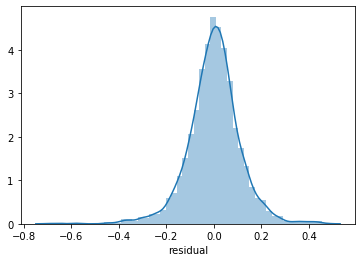

In [67]:
sns.distplot(res.resids)

# Some more tests

In [95]:
# model 1 - simplified - just 2012 and beyond

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + YEARS_SINCE_TNC_BUS \
                    + YEARS_SINCE_TNC_RAIL \
                    + EntityEffects \
                    ',data=df)
res=mod.fit()
print(res) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.6177
Estimator:                   PanelOLS   R-squared (Between):              0.9822
No. Observations:                3817   R-squared (Within):               0.6177
Date:                Thu, Dec 24 2020   R-squared (Overall):              0.9821
Time:                        02:02:01   Log-likelihood                    2960.9
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      638.93
Entities:                         249   P-value                           0.0000
Avg Obs:                       15.329   Distribution:                  F(9,3559)
Min Obs:                       7.0000                                           
Max Obs:                       17.000   F-statistic (robust):             638.93
                            

In [98]:
# combine into a single bus/rail

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + YEARS_SINCE_TNC_BUS \
                    + YEARS_SINCE_TNC_RAIL \
                    + EntityEffects \
                    ',data=df)
res=mod.fit()
print(res) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.6177
Estimator:                   PanelOLS   R-squared (Between):              0.9822
No. Observations:                3817   R-squared (Within):               0.6177
Date:                Thu, Dec 24 2020   R-squared (Overall):              0.9821
Time:                        02:05:24   Log-likelihood                    2960.9
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      638.93
Entities:                         249   P-value                           0.0000
Avg Obs:                       15.329   Distribution:                  F(9,3559)
Min Obs:                       7.0000                                           
Max Obs:                       17.000   F-statistic (robust):             638.93
                            

In [130]:
# combine into a single bus/rail

df['YEARS_SINCE_TNC_BUS_POW'] = np.power(df['YEARS_SINCE_TNC_BUS'], 1.5)
df['YEARS_SINCE_TNC_RAIL_POW'] = np.power(df['YEARS_SINCE_TNC_RAIL'], 1.5)

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + TSD_WA_EMP_PCT_LEHD \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + YEARS_SINCE_TNC_BUS_POW \
                    + YEARS_SINCE_TNC_RAIL_POW \
                    + EntityEffects \
                    ',data=df)
res=mod.fit()
print(res) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.6199
Estimator:                   PanelOLS   R-squared (Between):              0.9766
No. Observations:                3734   R-squared (Within):               0.6199
Date:                Thu, Dec 24 2020   R-squared (Overall):              0.9766
Time:                        02:39:06   Log-likelihood                    2908.7
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      567.83
Entities:                         243   P-value                           0.0000
Avg Obs:                       15.366   Distribution:                 F(10,3481)
Min Obs:                       7.0000                                           
Max Obs:                       17.000   F-statistic (robust):             567.83
                            

In [137]:
# combine into a single bus/rail

df['YEARS_SINCE_TNC_BUS_POW'] = np.power(df['YEARS_SINCE_TNC_BUS'], 1.5)
df['YEARS_SINCE_TNC_RAIL_POW'] = np.power(df['YEARS_SINCE_TNC_RAIL'], 1.5)

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + TSD_WA_EMP_PCT_LEHD \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + YEARS_SINCE_TNC_BUS_POW \
                    + YEARS_SINCE_TNC_RAIL_POW \
                    + EntityEffects \
                    ',data=df)
res=mod.fit()
print(res) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.6199
Estimator:                   PanelOLS   R-squared (Between):              0.9766
No. Observations:                3734   R-squared (Within):               0.6199
Date:                Thu, Dec 24 2020   R-squared (Overall):              0.9766
Time:                        02:41:13   Log-likelihood                    2908.7
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      567.83
Entities:                         243   P-value                           0.0000
Avg Obs:                       15.366   Distribution:                 F(10,3481)
Min Obs:                       7.0000                                           
Max Obs:                       17.000   F-statistic (robust):             567.83
                            

In [108]:
# systematically remove observations and see how it changes things
df = df.reset_index()
df['ID2'] = df['ID']
df=df.set_index(['ID','Year'])

# base model
mod=PanelOLS.from_formula('UPT_ADJ_log \
                        ~ VRM_ADJ_log \
                        + FARE_per_UPT_cleaned_2018_log \
                        + POP_EMP_log \
                        + GAS_PRICE_2018_log \
                        + TOTAL_MED_INC_INDIV_2018_log \
                        + PCT_HH_NO_VEH \
                        + JTW_HOME_PCT \
                        + YEARS_SINCE_TNC_BUS \
                        + YEARS_SINCE_TNC_RAIL \
                        + EntityEffects \
                        ',data=df)
res=mod.fit()
param_df = pd.DataFrame(res.params)
param_df = param_df.rename(columns={'parameter' : 'All Data'})

ids = df['ID2'].unique()
ids.sort()
for id in ids: 
    mod=PanelOLS.from_formula('UPT_ADJ_log \
                            ~ VRM_ADJ_log \
                            + FARE_per_UPT_cleaned_2018_log \
                            + POP_EMP_log \
                            + GAS_PRICE_2018_log \
                            + TOTAL_MED_INC_INDIV_2018_log \
                            + PCT_HH_NO_VEH \
                            + JTW_HOME_PCT \
                            + YEARS_SINCE_TNC_BUS \
                            + YEARS_SINCE_TNC_RAIL \
                            + EntityEffects \
                            ',data=df[df['ID2']!=id])
                
    res=mod.fit()
    temp_df = pd.DataFrame(res.params)
    temp_df = temp_df.rename(columns={'parameter' : id})
    param_df = pd.concat([param_df, temp_df], axis=1)

param_df.to_csv('id_test3.csv')
param_df


,All Data,"Akron, OH Metro Area-Bus","Albany, GA Metro Area-Bus","Albany-Schenectady-Troy, NY Metro Area-Bus","Albuquerque, NM Metro Area-Bus","Albuquerque, NM Metro Area-Rail","Allentown-Bethlehem-Easton, PA-NJ Metro Area-Bus","Altoona, PA Metro Area-Bus","Ames, IA Metro Area-Bus","Anchorage, AK Metro Area-Bus","Ann Arbor, MI Metro Area-Bus","Appleton, WI Metro Area-Bus","Asheville, NC Metro Area-Bus","Athens-Clarke County, GA Metro Area-Bus","Atlanta-Sandy Springs-Marietta, GA Metro Area-Bus","Atlanta-Sandy Springs-Marietta, GA Metro Area-Rail","Augusta-Richmond County, GA-SC Metro Area-Bus","Austin-Round Rock-San Marcos, TX Metro Area-Bus","Austin-Round Rock-San Marcos, TX Metro Area-Rail","Bakersfield-Delano, CA Metro Area-Bus","Baltimore-Towson, MD Metro Area-Bus","Baltimore-Towson, MD Metro Area-Rail","Baton Rouge, LA Metro Area-Bus","Bay City, MI Metro Area-Bus","Beaumont-Port Arthur, TX Metro Area-Bus","Bellingham, WA Metro Area-Bus","Billings, MT Metro Area-Bus","Binghamton, NY Metro Area-Bus","Birmingham-Hoover, AL Metro Area-Bus","Blacksburg-Christiansburg-Radford, VA Metro Area-Bus","Bloomington, IN Metro Area-Bus","Bloomington-Normal, IL Metro Area-Bus","Boise City-Nampa, ID Metro Area-Bus","Boston-Cambridge-Quincy, MA-NH Metro Area-Bus","Boston-Cambridge-Quincy, MA-NH Metro Area-Rail","Bremerton-Silverdale, WA Metro Area-Bus","Bridgeport-Stamford-Norwalk, CT Metro Area-Bus","Brownsville-Harlingen, TX Metro Area-Bus","Buffalo-Niagara Falls, NY Metro Area-Bus","Buffalo-Niagara Falls, NY Metro Area-Rail","Burlington-South Burlington, VT Metro Area-Bus","Canton-Massillon, OH Metro Area-Bus","Cape Coral-Fort Myers, FL Metro Area-Bus","Cedar Rapids, IA Metro Area-Bus","Champaign-Urbana, IL Metro Area-Bus","Charleston, WV Metro Area-Bus","Charleston-North Charleston-Summerville, SC Metro Area-Bus","Charlotte-Gastonia-Rock Hill, NC-SC Metro Area-Bus","Charlotte-Gastonia-Rock Hill, NC-SC Metro Area-Rail","Chattanooga, TN-GA Metro Area-Bus","Chicago-Joliet-Naperville, IL-IN-WI Metro Area-Bus","Chicago-Joliet-Naperville, IL-IN-WI Metro Area-Rail","Chico, CA Metro Area-Bus","Cincinnati-Middletown, OH-KY-IN Metro Area-Bus","Cleveland-Elyria-Mentor, OH Metro Area-Bus","Cleveland-Elyria-Mentor, OH Metro Area-Rail","Colorado Springs, CO Metro Area-Bus","Columbia, MO Metro Area-Bus","Columbia, SC Metro Area-Bus","Columbus, OH Metro Area-Bus","Corpus Christi, TX Metro Area-Bus","Corvallis, OR Metro Area-Bus","Crestview-Fort Walton Beach-Destin, FL Metro Area-Bus","Dallas-Fort Worth-Arlington, TX Metro Area-Bus","Dallas-Fort Worth-Arlington, TX Metro Area-Rail","Davenport-Moline-Rock Island, IA-IL Metro Area-Bus","Dayton, OH Metro Area-Bus","Decatur, IL Metro Area-Bus","Deltona-Daytona Beach-Ormond Beach, FL Metro Area-Bus","Denver-Aurora-Broomfield, CO Metro Area-Bus","Denver-Aurora-Broomfield, CO Metro Area-Rail","Des Moines-West Des Moines, IA Metro Area-Bus","Detroit-Warren-Livonia, MI Metro Area-Bus","Duluth, MN-WI Metro Area-Bus","Durham-Chapel Hill, NC Metro Area-Bus","Eau Claire, WI Metro Area-Bus","El Centro, CA Metro Area-Bus","El Paso, TX Metro Area-Bus","Elizabethtown, KY Metro Area-Bus","Elkhart-Goshen, IN Metro Area-Bus","Erie, PA Metro Area-Bus","Eugene-Springfield, OR Metro Area-Bus","Evansville, IN-KY Metro Area-Bus","Fargo, ND-MN Metro Area-Bus","Fayetteville, NC Metro Area-Bus","Flagstaff, AZ Metro Area-Bus","Flint, MI Metro Area-Bus","Fort Collins-Loveland, CO Metro Area-Bus","Fort Wayne, IN Metro Area-Bus","Fresno, CA Metro Area-Bus","Gainesville, FL Metro Area-Bus","Grand Rapids-Wyoming, MI Metro Area-Bus","Great Falls, MT Metro Area-Bus","Green Bay, WI Metro Area-Bus","Greensboro-High Point, NC Metro Area-Bus","Gulfport-Biloxi, MS Metro Area-Bus","Hanford-Corcoran, CA Metro Area-Bus","Harrisburg-Carlisle, PA Metro Area-Bus","Harrisonburg, VA Metro Area-Bus","Hartford-West Hartford-East Hartford, CT Metro Area-Bus","Hartford-West Hartford-East Hartford, CT Metro Area-Rail","Hickory-Lenoir-Morganton, NC Metro A

# Calculate FAC

In [160]:
# combine into a single bus/rail

mod=PanelOLS.from_formula('UPT_ADJ_log \
                    ~ VRM_ADJ_log \
                    + FARE_per_UPT_cleaned_2018_log \
                    + POP_EMP_log \
                    + TSD_WA_EMP_PCT_LEHD \
                    + GAS_PRICE_2018_log \
                    + TOTAL_MED_INC_INDIV_2018_log \
                    + PCT_HH_NO_VEH \
                    + JTW_HOME_PCT \
                    + YEARS_SINCE_TNC_BUS \
                    + YEARS_SINCE_TNC_RAIL \
                    + EntityEffects \
                    ',data=df)
res=mod.fit()
print(res) 

                          PanelOLS Estimation Summary                           
Dep. Variable:            UPT_ADJ_log   R-squared:                        0.6199
Estimator:                   PanelOLS   R-squared (Between):              0.9812
No. Observations:                3734   R-squared (Within):               0.6199
Date:                Thu, Dec 24 2020   R-squared (Overall):              0.9812
Time:                        02:57:09   Log-likelihood                    2908.4
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      567.68
Entities:                         243   P-value                           0.0000
Avg Obs:                       15.366   Distribution:                 F(10,3481)
Min Obs:                       7.0000                                           
Max Obs:                       17.000   F-statistic (robust):             567.68
                            

C:\ProgramData\Anaconda3\lib\site-packages\linearmodels\utility.py:549: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


In [161]:
# keep the relevant fields in the data set
app_data = pd.concat([df[['RAIL_FLAG', 'CLUSTER_APTA', 'UPT_ADJ_2012']], #no cbsa
                      df[res.model.dependent.vars], 
                      df[res.model.exog.vars], 
                      res.estimated_effects, 
                      res.resids], axis=1)

In [162]:
# carry the fixed effects forward for the same entity
app_data['estimated_effects'] = app_data['estimated_effects'].fillna(method='bfill')

In [163]:
# calculate the fitted values
app_data['fitted'] = app_data['estimated_effects']
for var in res.params.keys(): 
    app_data['fitted'] = app_data['fitted'] + (res.params[var] * app_data[var])

# and check that we add up correctly
app_data['check_fitted'] = app_data['fitted'] + app_data['residual'] - app_data['UPT_ADJ_log']

In [164]:
# create the necessary columns

# dependents
app_data['UPT_ADJ']    = np.exp(app_data['UPT_ADJ_log']) - 1
app_data['fitted_exp'] = np.exp(app_data['fitted']) - 1

# linear versions of logged variables
for var in res.params.keys(): 
    if '_log' in var: 
        app_data[var.replace('_log', '')] = np.exp(app_data[var]) - 1              

# ratios and differences
for var in res.params.keys(): 
    if '_log' in var: 
        app_data[var.replace('_log', '_ratio')] = 1
    else: 
        app_data[var+'_diff'] = 0

# FAC multipliers
for var in res.params.keys(): 
    app_data[var+'_FAC_ratio'] = 1

app_data['UPT_ADJ_base'] = 0
app_data['UPT_ADJ_ratio'] = 1
app_data['fitted_exp_ratio'] = 1
app_data['UPT_ADJ_diff'] = 0
app_data['fitted_exp_diff'] = 0

# for tracking new systems
app_data['UPT_ADJ_first_year'] = 0
app_data['UPT_ADJ_new_reporter'] = 0

In [165]:
# add predictions and exponetiated predicts
app_data['predicted'] = mod.predict(res.params, data=app_data) 
app_data['predicted'] = app_data['predicted'] + app_data['estimated_effects']
app_data['predicted_exp'] = np.exp(app_data['predicted']) - 1
app_data['predicted_residual'] = app_data['UPT_ADJ_log'] - app_data['predicted']
app_data['predicted_exp_diff'] = app_data['UPT_ADJ'] - app_data['predicted_exp']


In [166]:
# get the ridership in the first year the system starts. This allows us to track new systems. 
# calculate the FAC relative to a specific base year
ids = app_data.index.get_level_values(0).unique()

for id in ids: 
    years = app_data.loc[id].index.get_level_values(0).sort_values()
    first_year = years[0]

    app_data.loc[(id,first_year),'UPT_ADJ_new_reporter'] = app_data.loc[(id,first_year),'UPT_ADJ']
    
    for year in years: 
        app_data.loc[(id,year),'UPT_ADJ_first_year']   = app_data.loc[(id,first_year),'UPT_ADJ']

In [167]:
# calculate the FAC relative to a specific base year
ids = app_data.index.get_level_values(0).unique()

for id in ids: 
    years = app_data.loc[id].index.get_level_values(0).sort_values()

    for year in years[1:]:       
        base_year = year-1
        
        for var in res.params.keys(): 
            # ratios and differences
            if '_log' in var: 
                out_var = var.replace('_log', '_ratio')
                app_data.loc[(id,year), out_var] = (app_data.loc[(id,year), var] 
                                                 / app_data.loc[(id,base_year), var])
            else: 
                out_var = var+'_diff'                    
                app_data.loc[(id,year), out_var] = (app_data.loc[(id,year), var] 
                                                 - app_data.loc[(id,base_year), var])

            # FAC multipliers
            app_data.loc[(id,year),var+'_FAC_ratio'] = np.exp(res.params[var] * (
                                                    app_data.loc[(id,year), var] 
                                                    - app_data.loc[(id,base_year), var]))

            # estimated effects (if time effects is zero, no change)
            app_data.loc[(id,year),'effects_FAC_ratio'] = np.exp(
                                                    app_data.loc[(id,year), 'estimated_effects'] 
                                                    - app_data.loc[(id,base_year), 'estimated_effects'])

            # residual
            app_data.loc[(id,year),'residual_FAC_ratio'] = np.exp(
                                                    app_data.loc[(id,year), 'residual'] 
                                                    - app_data.loc[(id,base_year), 'residual'])

        # observed and fitted changes            
        app_data.loc[(id,year),'UPT_ADJ_base'] = app_data.loc[(id,base_year),'UPT_ADJ']
        app_data.loc[(id,year),'UPT_ADJ_ratio'] = (app_data.loc[(id,year),'UPT_ADJ'] 
                                                 / app_data.loc[(id,base_year),'UPT_ADJ'])
        app_data.loc[(id,year),'fitted_exp_ratio'] = (app_data.loc[(id,year),'fitted_exp'] 
                                                 / app_data.loc[(id,base_year),'fitted_exp'])

        app_data.loc[(id,year),'UPT_ADJ_diff'] = (app_data.loc[(id,year),'UPT_ADJ'] 
                                                 - app_data.loc[(id,base_year),'UPT_ADJ'])
        app_data.loc[(id,year),'fitted_exp_diff'] = (app_data.loc[(id,year),'fitted_exp'] 
                                                 - app_data.loc[(id,base_year),'fitted_exp'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


In [168]:
# calculate the FAC
app_data['FAC_Sum'] = 0
for var in res.params.keys(): 
    app_data[var+'_FAC'] = (app_data[var+'_FAC_ratio'] - 1) * app_data['UPT_ADJ_base']
    app_data['FAC_Sum'] = app_data['FAC_Sum'] + app_data[var+'_FAC']




In [169]:

# total FAC is based on the fitted model (applied multiplicitively)
app_data['Known_FAC'] = (app_data['fitted_exp_ratio'] - 1) * app_data['UPT_ADJ_base']

# uknown change is the difference between the observed change and the known change
app_data['Unknown_FAC'] = app_data['UPT_ADJ_diff'] - app_data['Known_FAC']

# the change in ridership associated new systems
app_data['New_Reporter_FAC'] = app_data['UPT_ADJ_new_reporter'] 

# should be teh same as UPT_ADJ_DIFF
app_data['Total_Change'] = app_data['Known_FAC'] + app_data['Unknown_FAC'] + app_data['New_Reporter_FAC']

In [170]:
# calculate APTA - 4 groups
app_data['CLUSTER_APTA4'] = np.floor(app_data['CLUSTER_APTA']/10)

In [171]:
# reset the index so I get ID and year
app_data = app_data.reset_index()
app_data = app_data.rename(columns={'level_0' : 'ID', 'level_1' : 'Year'})
app_data.to_csv('FAC-11-5b.csv')

In [172]:
# these are the fields we keep
out_fields = ['ID', 'Year', 'RAIL_FLAG', 
              'CLUSTER_APTA', 'CLUSTER_APTA4',    
              'UPT_ADJ_first_year', 
              'UPT_ADJ_2012', 
              'UPT_ADJ_base', 'UPT_ADJ', 'UPT_ADJ_diff', 
              'fitted_exp', 'fitted_exp_diff']

# exogenous variables 
for var in res.params.keys(): 
    out_var = var.replace('_log', '')
    out_fields = out_fields + [out_var]
    
# FAC
for var in res.params.keys(): 
    out_fields = out_fields + [var+'_FAC']
out_fields = out_fields + ['FAC_Sum', 'Known_FAC', 'Unknown_FAC', 'New_Reporter_FAC', 'Total_Change']
    
# keep those fields
summary_data = app_data.reset_index()[out_fields]

In [173]:
# take weighted average of exogenous variables
for var in res.params.keys(): 
    out_var = var.replace('_log', '')
    summary_data[out_var] = summary_data[out_var] * summary_data['UPT_ADJ_first_year']

# aggregate to bus/rail totals
summary_data_apta4 = summary_data.groupby(by=['CLUSTER_APTA4', 'RAIL_FLAG', 'Year']).agg('sum')

# divide for weighted averages
for var in res.params.keys(): 
    out_var = var.replace('_log', '')
    summary_data_apta4[out_var] = summary_data_apta4[out_var] / summary_data_apta4['UPT_ADJ_first_year']

In [174]:

summary_data_apta4.to_csv('FAC_APTA4_CLUSTERS_11-5b.csv')




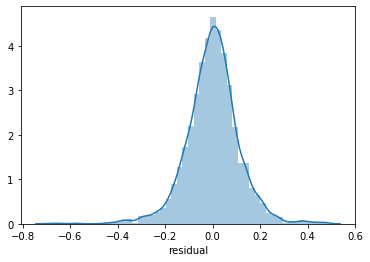

In [175]:
sns.distplot(app_data['residual'])

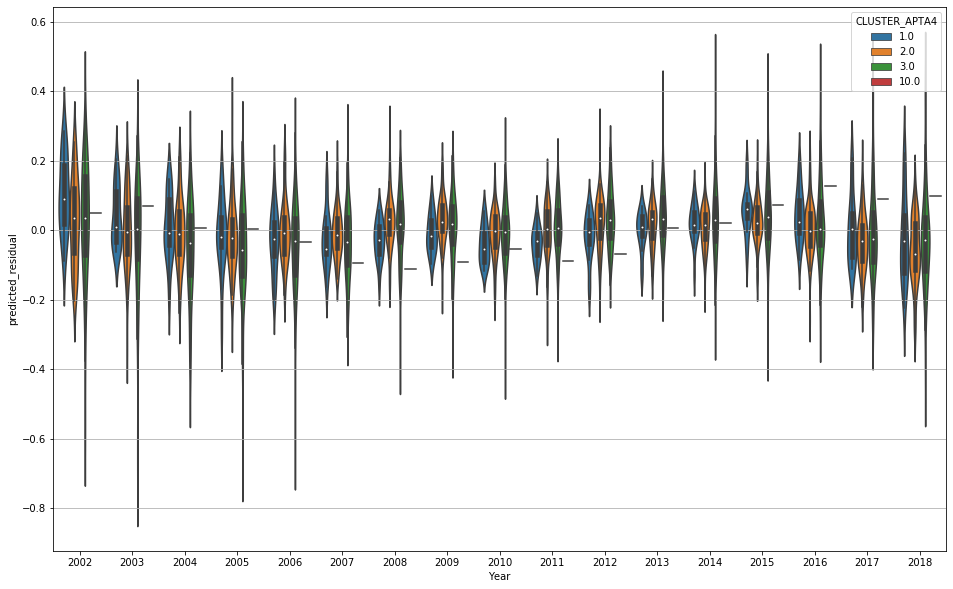

In [176]:
plt.figure(figsize=(16, 10))
plt.grid()
sns.violinplot(x="Year", y="predicted_residual", hue="CLUSTER_APTA4", data=app_data[app_data['RAIL_FLAG']==0])

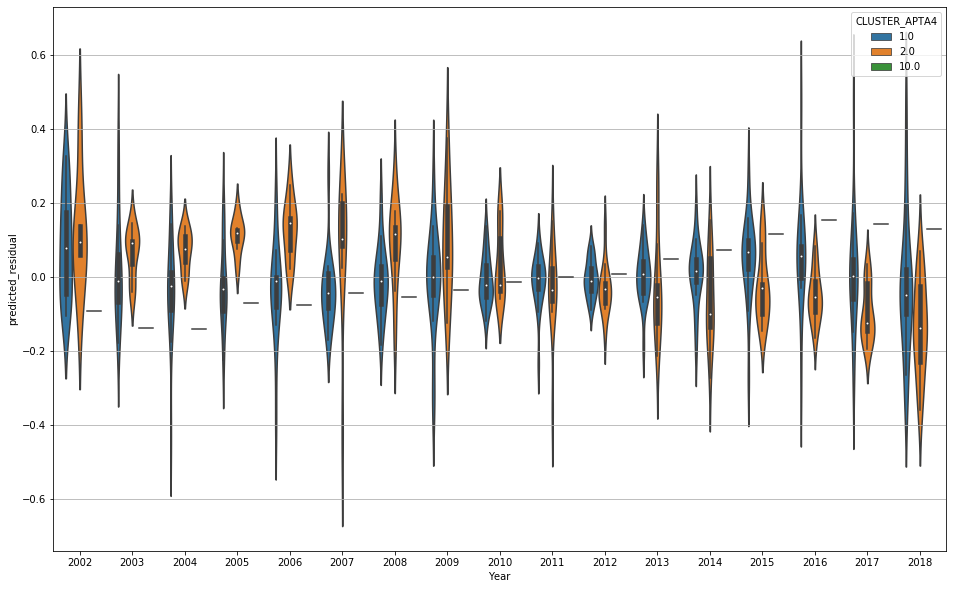

In [155]:
plt.figure(figsize=(16, 10))
plt.grid()
sns.violinplot(x="Year", y="predicted_residual", hue="CLUSTER_APTA4", data=app_data[app_data['RAIL_FLAG']==1])

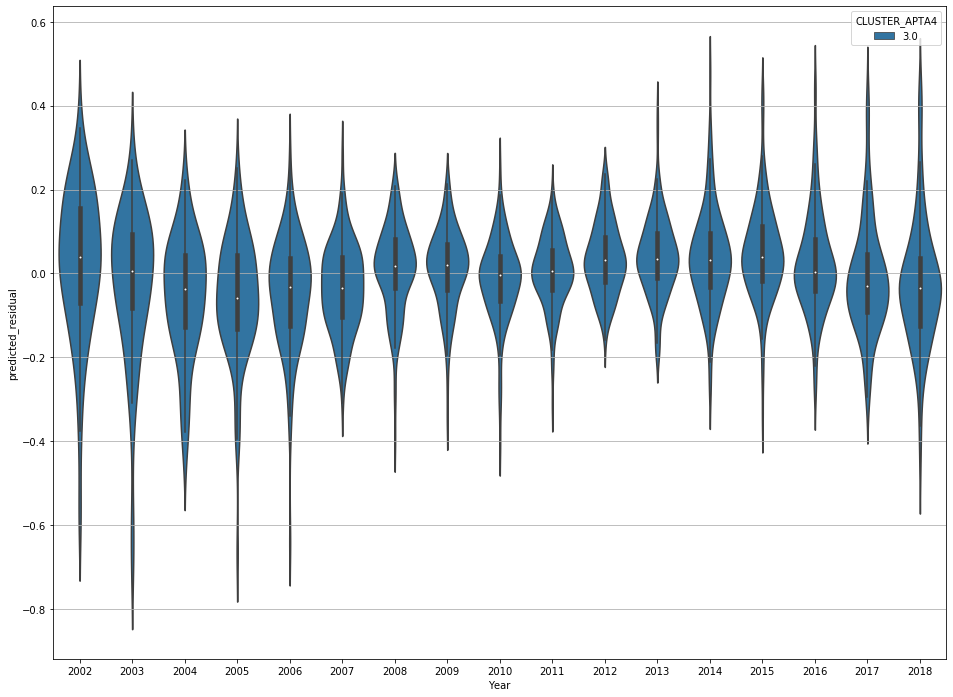

In [156]:
plt.figure(figsize=(16, 12))
plt.grid()
sns.violinplot(x="Year", y="predicted_residual", hue="CLUSTER_APTA4", data=app_data[app_data['CLUSTER_APTA4']==3])

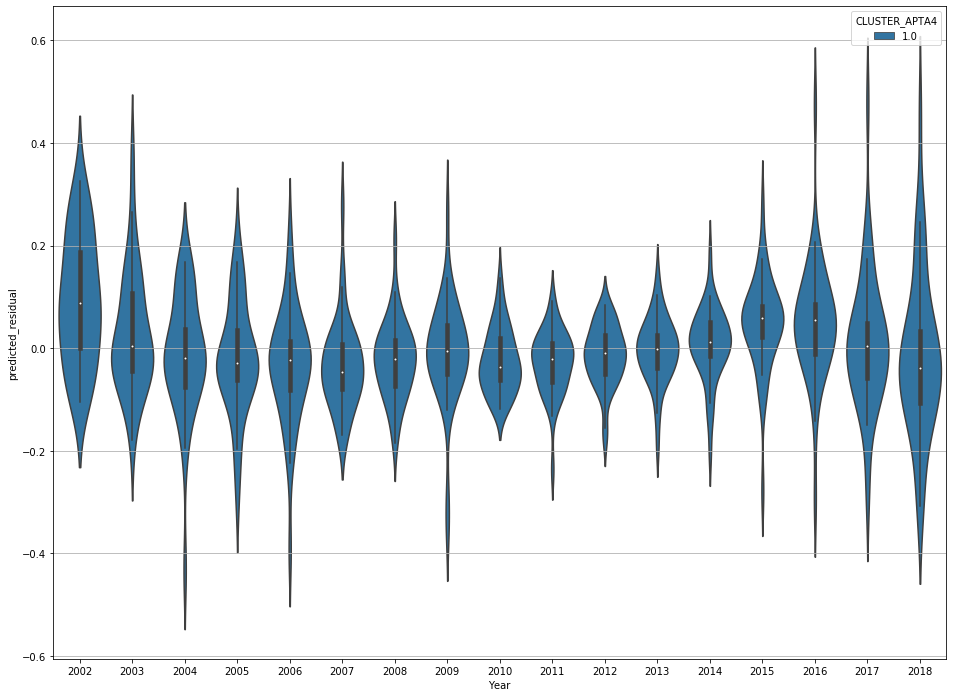

In [157]:
plt.figure(figsize=(16, 12))
plt.grid()
sns.violinplot(x="Year", y="predicted_residual", hue="CLUSTER_APTA4", data=app_data[app_data['CLUSTER_APTA4']==1])

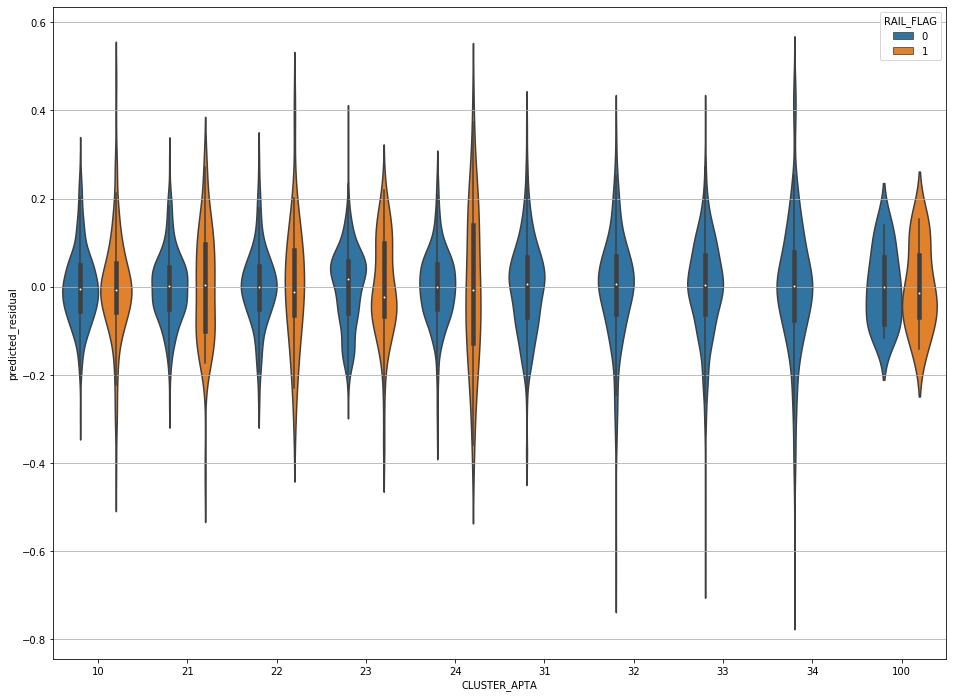

In [158]:
plt.figure(figsize=(16, 12))
plt.grid()
sns.violinplot(x="CLUSTER_APTA", y="predicted_residual", hue="RAIL_FLAG", data=app_data)

In [159]:
app_data['YEARS_SINCE_TNC'] =(app_data['YEARS_SINCE_TNC_BUS_NY'] 
                            + app_data['YEARS_SINCE_TNC_BUS_HI']
                            + app_data['YEARS_SINCE_TNC_BUS_MID']
                            + app_data['YEARS_SINCE_TNC_BUS_LOW']
                            + app_data['YEARS_SINCE_TNC_RAIL_NY']
                            + app_data['YEARS_SINCE_TNC_RAIL_HI']
                            + app_data['YEARS_SINCE_TNC_RAIL_MID']) 
                              

KeyError: 'YEARS_SINCE_TNC_BUS_NY'

In [ ]:
plt.figure(figsize=(16, 12))
plt.grid()
sns.violinplot(x="YEARS_SINCE_TNC", y="predicted_residual", hue="CLUSTER_APTA4", data=app_data[app_data['RAIL_FLAG']==0])


In [ ]:
plt.figure(figsize=(16, 12))
plt.grid()
sns.violinplot(x="YEARS_SINCE_TNC", 
               y="predicted_residual", 
               hue="CLUSTER_APTA4", 
               data=app_data[app_data['RAIL_FLAG']==1])


In [ ]:
df2 = df.reset_index()

In [ ]:
plt.figure(figsize=(16, 10))
plt.grid()
sns.violinplot(x="Year", y="YEARS_SINCE_TNC", hue="CLUSTER_APTA4", data=df2)

In [ ]:
plt.figure(figsize=(16, 10))
plt.grid()
sns.violinplot(x="Year", y="TNC_TRIPS_PER_CAPITA_CLUSTER", hue="CLUSTER_APTA4", data=df2)

In [ ]:
plt.figure(figsize=(16, 10))
plt.grid()
sns.violinplot(x="Year", y="TNC_TRIPS_PER_UPT_2012", hue="CLUSTER_APTA4", data=df2)

In [ ]:
df2 = app_data[['RAIL_FLAG',
               'Unknown_FAC', 
               'VRM_ADJ_log', 
               'VRM_ADJ_ratio', 
               'FARE_per_UPT_cleaned_2018_ratio', 
               'POP_EMP_ratio', 
               'GAS_PRICE_2018_ratio',
               'TOTAL_MED_INC_INDIV_2018_ratio',
               'PCT_HH_NO_VEH_diff',
               'JTW_HOME_PCT_diff'
              ]]
sns.PairGrid(df2, hue="RAIL_FLAG")

In [ ]:
df2 = app_data[['RAIL_FLAG', 
               'Unknown_FAC', 
               'YEARS_SINCE_TNC_BUS_NY_diff', 
               'YEARS_SINCE_TNC_BUS_HI_diff', 
               'YEARS_SINCE_TNC_BUS_MID_diff', 
               'YEARS_SINCE_TNC_BUS_LOW_diff', 
               'YEARS_SINCE_TNC_RAIL_NY_diff',
               'YEARS_SINCE_TNC_RAIL_HI_diff',
               'YEARS_SINCE_TNC_RAIL_MID_diff'
              ]]
sns.PairGrid(df2, hue="RAIL_FLAG")